<h4><center>Parity Risk Strategies on a variety of Portfolio (Bonds, Equities, Commodities, and Currencies)</center></h4>

<h5><center>Dataset cover time frame from Jan 2000 till Dec 2008</center></h5>

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
from matplotlib import rcParams
from datetime import datetime

In [2]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2000_2008 = pd.read_csv('Bond_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2000_2008.head()

(108, 7)


,Date,Germany,Australia,US,UK,Canada,Japan
0,1/1/2000,98.71,102.11,95.28,100.23,92.80,99.87
1,2/1/2000,99.07,106.07,100.59,102.33,95.62,99.70
2,3/1/2000,101.07,108.00,103.66,103.86,96.91,100.86
3,4/1/2000,100.46,107.28,102.28,104.06,95.09,100.13
4,5/1/2000,100.53,109.13,101.53,104.33,96.27,100.59


In [3]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       108 non-null    object 
 1   Germany    108 non-null    float64
 2   Australia  108 non-null    float64
 3   US         108 non-null    float64
 4   UK         108 non-null    float64
 5   Canada     108 non-null    float64
 6   Japan      108 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.0+ KB


In [4]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2000_2008['Date'] = pd.to_datetime(bond_df_2000_2008.Date)

In [5]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       108 non-null    datetime64[ns]
 1   Germany    108 non-null    float64       
 2   Australia  108 non-null    float64       
 3   US         108 non-null    float64       
 4   UK         108 non-null    float64       
 5   Canada     108 non-null    float64       
 6   Japan      108 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.0 KB


In [6]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2000_2008.set_index('Date',inplace=True)

In [7]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
bond_df_2000_2008.isnull().any()

Germany      False
Australia    False
US           False
UK           False
Canada       False
Japan        False
dtype: bool

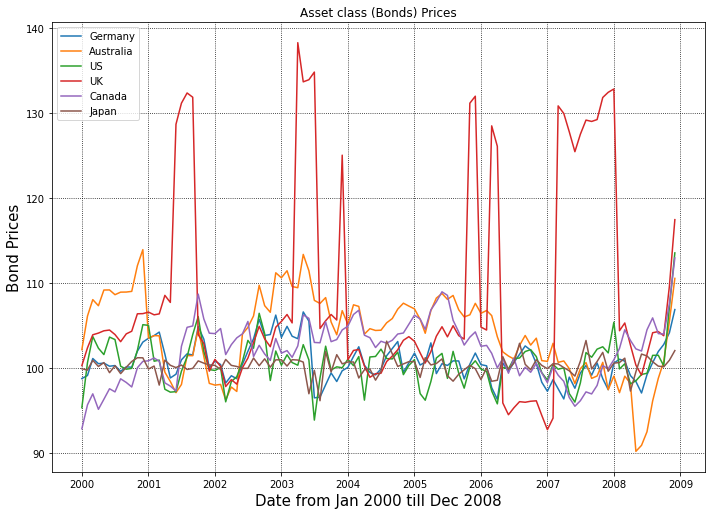

In [8]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.Germany, label='Germany')
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.Australia, label='Australia')
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.US, label='US')
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.UK, label='UK')
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.Canada, label='Canada')
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.Japan, label='Japan')

plt.title('Asset class (Bonds) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=15)
plt.ylabel('Bond Prices', fontsize=15)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [9]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2000_2008 = bond_df_2000_2008[['Germany','Australia','US','UK','Canada','Japan']].pct_change()
bond_df_2000_2008.head(5)

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.003647,0.038782,0.055730,0.020952,0.030388,-0.001702
2000-03-01,0.020188,0.018196,0.030520,0.014952,0.013491,0.011635
2000-04-01,-0.006035,-0.006667,-0.013313,0.001926,-0.018780,-0.007238
2000-05-01,0.000697,0.017245,-0.007333,0.002595,0.012409,0.004594


In [10]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2000_2008.dropna(axis=0, inplace=True)
bond_df_2000_2008.head(5)

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2000-02-01,0.003647,0.038782,0.055730,0.020952,0.030388,-0.001702
2000-03-01,0.020188,0.018196,0.030520,0.014952,0.013491,0.011635
2000-04-01,-0.006035,-0.006667,-0.013313,0.001926,-0.018780,-0.007238
2000-05-01,0.000697,0.017245,-0.007333,0.002595,0.012409,0.004594
2000-06-01,-0.003680,0.000092,0.020290,0.000863,0.012880,-0.011830


In [11]:
print('There are {} rows in the DataFrame'.format(bond_df_2000_2008.shape[0]))

There are 107 rows in the DataFrame


In [12]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
bond_df_2000_2008_2 = bond_df_2000_2008.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [13]:
vol_bond_df_2000_2008 = bond_df_2000_2008

In [14]:
vol_bond_df_2000_2008.shape[0]

107

In [15]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_bond_df_2000_2008['Germany_Vol'] = vol_bond_df_2000_2008['Germany'].rolling(107).std() * math.sqrt(107)
vol_bond_df_2000_2008['Australia_Vol'] = vol_bond_df_2000_2008['Australia'].rolling(107).std() * math.sqrt(107)
vol_bond_df_2000_2008['US_Vol'] = vol_bond_df_2000_2008['US'].rolling(107).std() * math.sqrt(107)
vol_bond_df_2000_2008['UK_Vol'] = vol_bond_df_2000_2008['UK'].rolling(107).std() * math.sqrt(107)
vol_bond_df_2000_2008['Canada_Vol'] = vol_bond_df_2000_2008['Canada'].rolling(107).std() * math.sqrt(107)
vol_bond_df_2000_2008['Japan_Vol'] = vol_bond_df_2000_2008['Japan'].rolling(107).std() * math.sqrt(107)

In [16]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_bond_df_2000_2008.dropna(axis=0, inplace=True)

In [17]:
vol_bond_df_2000_2008[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']]

,Germany_Vol,Australia_Vol,US_Vol,UK_Vol,Canada_Vol,Japan_Vol
Date,,,,,,
2008-12-01,0.184647,0.238454,0.261858,0.868501,0.172802,0.155408


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [18]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility = (0.184647+0.238454+0.261858+0.868501+0.172802+0.155408) / 6
volatility

0.3136116666666666

In [19]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_bond_df_2000_2008 = 0.3136116666666666 / 6
target_vol_bond_df_2000_2008

0.052268611111111106

In [20]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_bond_df_2000_2008 = bond_df_2000_2008

In [21]:
port_bond_df_2000_2008['Germany_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['Germany_Vol'] 
port_bond_df_2000_2008['Australia_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['Australia_Vol'] 
port_bond_df_2000_2008['US_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['US_Vol']
port_bond_df_2000_2008['UK_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['UK_Vol']
port_bond_df_2000_2008['Canada_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['Canada_Vol']
port_bond_df_2000_2008['Japan_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['Japan_Vol']

In [22]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_bond_df_2000_2008.dropna(axis=0, inplace=True)

In [23]:
port_bond_df_2000_2008[['Germany_Alloc','Australia_Alloc','US_Alloc','UK_Alloc','Canada_Alloc','Japan_Alloc']]

,Germany_Alloc,Australia_Alloc,US_Alloc,UK_Alloc,Canada_Alloc,Japan_Alloc
Date,,,,,,
2008-12-01,0.283073,0.219198,0.199607,0.060183,0.302477,0.336332


In [24]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (bonds)

In [25]:
bond_df_2000_2008_2['Germany_R'] = bond_df_2000_2008_2['Germany'] * 0.283073
bond_df_2000_2008_2['Australia_R'] = bond_df_2000_2008_2['Australia'] * 0.219198
bond_df_2000_2008_2['US_R'] = bond_df_2000_2008_2['US'] * 0.199607
bond_df_2000_2008_2['UK_R'] = bond_df_2000_2008_2['UK'] * 0.060183
bond_df_2000_2008_2['Canada_R'] = bond_df_2000_2008_2['Canada'] * 0.302477
bond_df_2000_2008_2['Japan_R'] = bond_df_2000_2008_2['Japan'] * 0.336332

In [26]:
bond_df_2000_2008_2.head(5)

,Germany,Australia,US,UK,Canada,Japan,Germany_R,Australia_R,US_R,UK_R,Canada_R,Japan_R
Date,,,,,,,,,,,,
2000-02-01,0.003647,0.038782,0.055730,0.020952,0.030388,-0.001702,0.001032,0.008501,0.011124,0.001261,0.009192,-0.000573
2000-03-01,0.020188,0.018196,0.030520,0.014952,0.013491,0.011635,0.005715,0.003988,0.006092,0.000900,0.004081,0.003913
2000-04-01,-0.006035,-0.006667,-0.013313,0.001926,-0.018780,-0.007238,-0.001708,-0.001461,-0.002657,0.000116,-0.005681,-0.002434
2000-05-01,0.000697,0.017245,-0.007333,0.002595,0.012409,0.004594,0.000197,0.003780,-0.001464,0.000156,0.003754,0.001545
2000-06-01,-0.003680,0.000092,0.020290,0.000863,0.012880,-0.011830,-0.001042,0.000020,0.004050,0.000052,0.003896,-0.003979


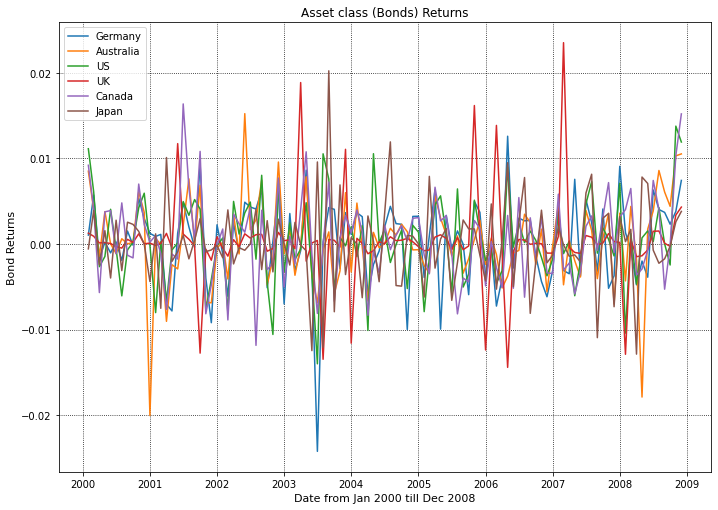

In [27]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.Germany_R, label='Germany')
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.Australia_R, label='Australia')
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.US_R, label='US')
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.UK_R, label='UK')
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.Canada_R, label='Canada')
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.Japan_R, label='Japan')

plt.title('Asset class (Bonds) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=11)
plt.ylabel('Bond Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [28]:
# Adding up all the returns of all asset classes for all countries

In [29]:
bond_df_2000_2008_2['Portfolio_R'] = bond_df_2000_2008_2['Germany_R'] + bond_df_2000_2008_2['Australia_R'] + bond_df_2000_2008_2['US_R'] + bond_df_2000_2008_2['UK_R'] + bond_df_2000_2008_2['Canada_R'] + bond_df_2000_2008_2['Japan_R']

In [30]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [31]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
bond_df_2000_2008_2['Bond_Port_Value'] = ((bond_df_2000_2008_2['Portfolio_R'] + 1).cumprod())*1000

In [32]:
bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R', 'Portfolio_R', 'Bond_Port_Value']].head(5)

,Germany_R,Australia_R,US_R,UK_R,Canada_R,Japan_R,Portfolio_R,Bond_Port_Value
Date,,,,,,,,
2000-02-01,0.001032,0.008501,0.011124,0.001261,0.009192,-0.000573,0.030538,1030.537531
2000-03-01,0.005715,0.003988,0.006092,0.000900,0.004081,0.003913,0.024689,1055.980198
2000-04-01,-0.001708,-0.001461,-0.002657,0.000116,-0.005681,-0.002434,-0.013826,1041.380097
2000-05-01,0.000197,0.003780,-0.001464,0.000156,0.003754,0.001545,0.007968,1049.678171
2000-06-01,-0.001042,0.000020,0.004050,0.000052,0.003896,-0.003979,0.002997,1052.824326


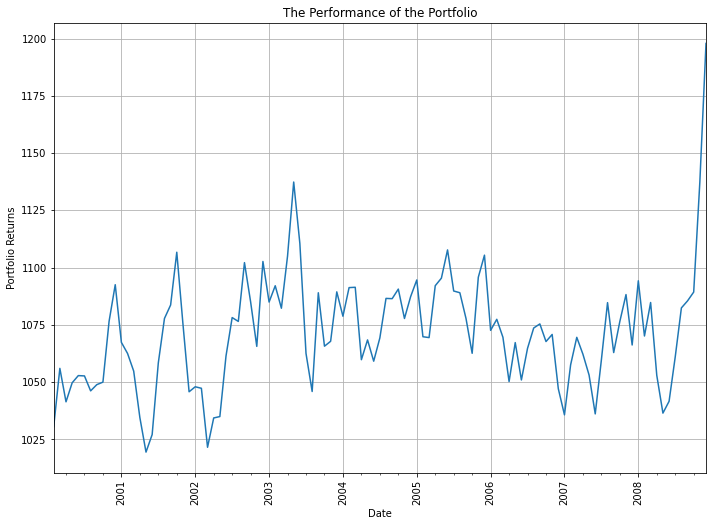

In [33]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2000 till Dec 2008');
plt.ylabel('Portfolio Returns');
bond_df_2000_2008_2['Bond_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [34]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(bond_df_2000_2008_2.Bond_Port_Value.max() - bond_df_2000_2008_2.Bond_Port_Value.min()) / bond_df_2000_2008_2.Bond_Port_Value.max()

0.1489614971640631

In [35]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (bond_df_2000_2008_2['Bond_Port_Value'][-1] / bond_df_2000_2008_2['Bond_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 16.24%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [36]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
bond_df_2000_2008_2['Monthly_Return'] = bond_df_2000_2008_2['Bond_Port_Value'].pct_change(1)

In [37]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = bond_df_2000_2008_2['Monthly_Return'].mean() / bond_df_2000_2008_2['Monthly_Return'].std()
Sharpe_Ratio

0.08640835049051637

In [38]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(107)
Annualized_Sharpe_Ratio

0.8938149275384898

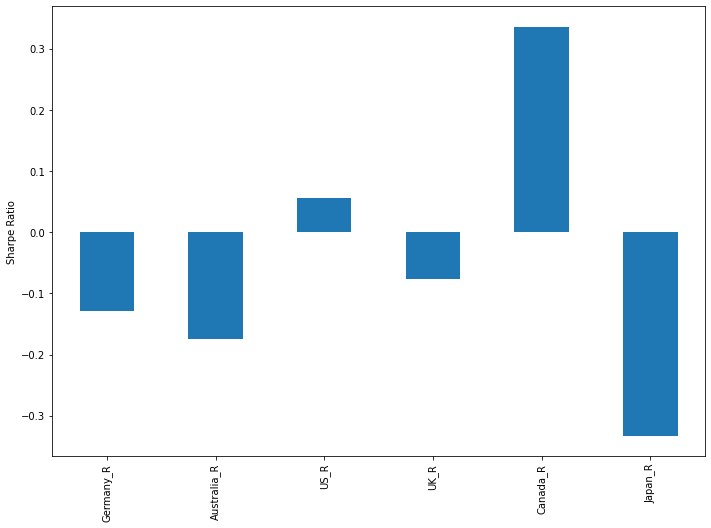

In [39]:
# Calcualte the Sharpe Ratio for bond portfolio
def bond_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sharpes = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
bond_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

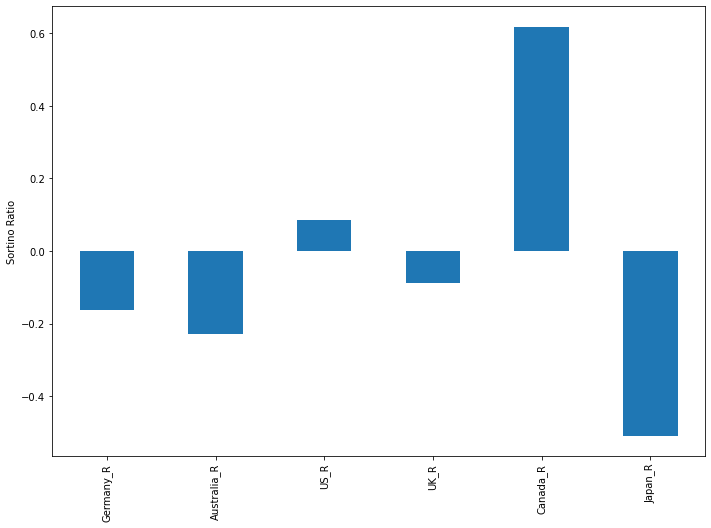

In [40]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sortinos = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
bond_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

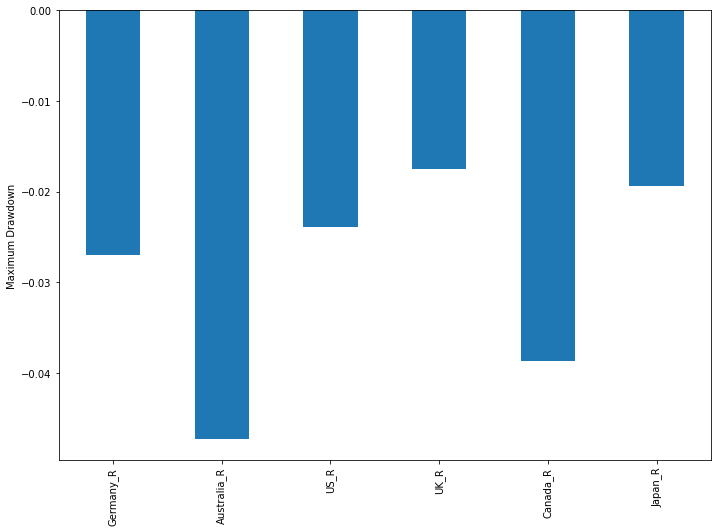

In [41]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def bond_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_max_drawdown = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
bond_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2008.
- Target volatility 5.22 %.
- Maximum Drawdown 14.89 %.
- Cumulative return of the o=portfolio 16.24 %
- Sharpe Ratio 8.64 %.


In [42]:
# Dataset (Equity.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df_2000_2008 = pd.read_csv('Equity_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df_2000_2008.head()

(108, 26)


,Date,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,...,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South Africa,Indonesia,Venezuela
0,1/1/2000,3080.2,612.38,6835.60,8481.11,1.553234e+10,5.659810e+09,2.806290e+09,1.394460e+09,19539.70,...,1151.42,16388.27,566.28,188.81,167.15,12385.55,3234.78,7771.66,636.37,90224.09
1,2/1/2000,3124.6,664.28,7644.55,9128.99,1.716944e+10,6.190960e+09,2.746080e+09,1.366420e+09,19959.52,...,1106.18,17660.20,631.64,191.49,159.46,14644.27,3239.69,7287.01,576.54,69894.88
2,3/1/2000,3133.3,662.29,7599.39,9462.39,1.740654e+10,6.286050e+09,2.777840e+09,1.498580e+09,20337.32,...,1128.58,17820.37,569.24,254.68,159.20,13127.09,3189.06,7388.34,583.28,47772.07
3,4/1/2000,3115.8,661.38,7414.68,9347.61,1.551930e+10,6.419720e+09,2.813280e+09,1.452430e+09,17973.70,...,1075.01,15537.60,509.51,242.85,192.06,12235.62,3170.85,6913.24,526.74,48856.03
4,5/1/2000,3081.0,655.50,7109.67,9251.99,1.471386e+10,6.426260e+09,2.849430e+09,1.420600e+09,16332.45,...,1124.19,14956.61,464.30,217.05,162.06,11864.13,2901.45,6921.37,454.33,55583.02


In [43]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          108 non-null    object 
 1   Australia     108 non-null    float64
 2   Nethelands    108 non-null    float64
 3   Germany       108 non-null    float64
 4   Canada        108 non-null    float64
 5   Hong_Kong     108 non-null    float64
 6   France        108 non-null    float64
 7   Belgium       108 non-null    float64
 8   US            108 non-null    float64
 9   Japan         108 non-null    float64
 10  Spain         108 non-null    float64
 11  Sweden        108 non-null    float64
 12  UK            108 non-null    float64
 13  Italy         108 non-null    float64
 14  Singapore     108 non-null    float64
 15  Thailand      108 non-null    float64
 16  Chile         108 non-null    float64
 17  Brazil        108 non-null    float64
 18  Argentina     108 non-null    

In [44]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df_2000_2008['Date'] = pd.to_datetime(equity_df_2000_2008.Date)

In [45]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          108 non-null    datetime64[ns]
 1   Australia     108 non-null    float64       
 2   Nethelands    108 non-null    float64       
 3   Germany       108 non-null    float64       
 4   Canada        108 non-null    float64       
 5   Hong_Kong     108 non-null    float64       
 6   France        108 non-null    float64       
 7   Belgium       108 non-null    float64       
 8   US            108 non-null    float64       
 9   Japan         108 non-null    float64       
 10  Spain         108 non-null    float64       
 11  Sweden        108 non-null    float64       
 12  UK            108 non-null    float64       
 13  Italy         108 non-null    float64       
 14  Singapore     108 non-null    float64       
 15  Thailand      108 non-null    float64   

In [46]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df_2000_2008.set_index('Date',inplace=True)

In [47]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
equity_df_2000_2008.isnull().any()

Australia       False
Nethelands      False
Germany         False
Canada          False
Hong_Kong       False
France          False
Belgium         False
US              False
Japan           False
Spain           False
Sweden          False
UK              False
Italy           False
Singapore       False
Thailand        False
Chile           False
Brazil          False
Argentina       False
Russia          False
Turkey          False
Portugal        False
Finland         False
South Africa    False
Indonesia       False
Venezuela       False
dtype: bool

In [48]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df_2000_2008 = equity_df_2000_2008.rename(columns={'France ':'France'})
equity_df_2000_2008 = equity_df_2000_2008.rename(columns={'Japan ':'Japan'})
equity_df_2000_2008 = equity_df_2000_2008.rename(columns={'Sweden ':'Sweden'})
equity_df_2000_2008 = equity_df_2000_2008.rename(columns={'South Africa':'South_Africa'})

In [49]:
equity_df_2000_2008[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                     'US','Japan','Spain','Sweden','UK','Italy','Singapore','Thailand','Chile',
                     'Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                           'South_Africa','Indonesia','Venezuela']].head(3)

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,...,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South_Africa,Indonesia,Venezuela
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,3080.2,612.38,6835.60,8481.11,1.553234e+10,5.659810e+09,2.806290e+09,1.394460e+09,19539.70,10835.1,...,1151.42,16388.27,566.28,188.81,167.15,12385.55,3234.78,7771.66,636.37,90224.09
2000-02-01,3124.6,664.28,7644.55,9128.99,1.716944e+10,6.190960e+09,2.746080e+09,1.366420e+09,19959.52,12585.8,...,1106.18,17660.20,631.64,191.49,159.46,14644.27,3239.69,7287.01,576.54,69894.88
2000-03-01,3133.3,662.29,7599.39,9462.39,1.740654e+10,6.286050e+09,2.777840e+09,1.498580e+09,20337.32,11935.0,...,1128.58,17820.37,569.24,254.68,159.20,13127.09,3189.06,7388.34,583.28,47772.07


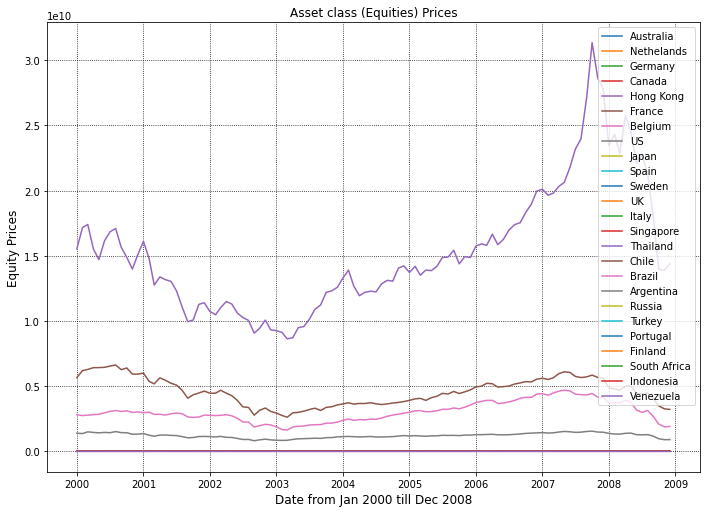

In [50]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Australia, label='Australia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Nethelands, label='Nethelands')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Germany, label='Germany')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Canada, label='Canada')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.France, label='France')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Belgium, label='Belgium')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.US, label='US')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Japan, label='Japan')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Spain, label='Spain')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Sweden, label='Sweden')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.UK, label='UK')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Italy, label='Italy')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Singapore, label='Singapore')

plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Thailand, label='Thailand')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Chile, label='Chile')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Brazil, label='Brazil')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Argentina, label='Argentina')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Russia, label='Russia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Turkey, label='Turkey')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Portugal, label='Portugal')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Finland, label='Finland')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.South_Africa, label='South Africa')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Indonesia, label='Indonesia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Venezuela, label='Venezuela')

plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

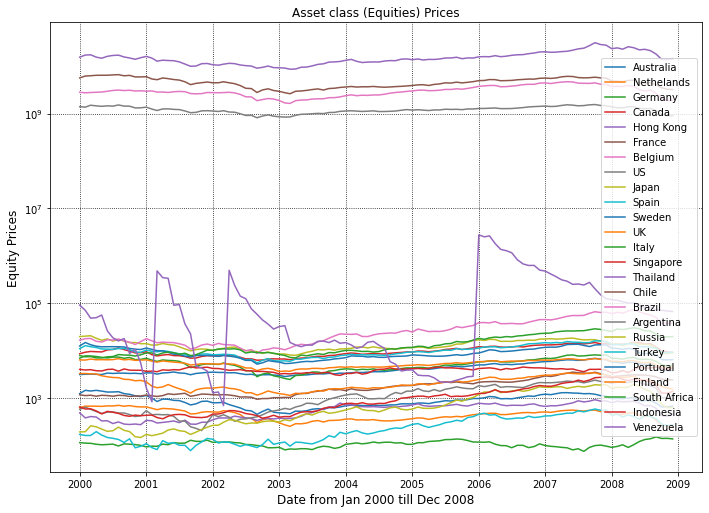

In [51]:
rcParams['figure.figsize'] = 11.69,8.27
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Australia, label='Australia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Nethelands, label='Nethelands')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Germany, label='Germany')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Canada, label='Canada')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.France, label='France')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Belgium, label='Belgium')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.US, label='US')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Japan, label='Japan')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Spain, label='Spain')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Sweden, label='Sweden')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.UK, label='UK')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Italy, label='Italy')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Singapore, label='Singapore')

plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Thailand, label='Thailand')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Chile, label='Chile')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Brazil, label='Brazil')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Argentina, label='Argentina')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Russia, label='Russia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Turkey, label='Turkey')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Portugal, label='Portugal')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Finland, label='Finland')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.South_Africa, label='South Africa')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Indonesia, label='Indonesia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Venezuela, label='Venezuela')

plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [52]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df_2000_2008 = equity_df_2000_2008[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                                           'US','Japan','Spain','Sweden','UK','Italy','Singapore','Thailand','Chile',
                                           'Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                                           'South_Africa','Indonesia','Venezuela']].pct_change()
equity_df_2000_2008.head(5)

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,...,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South_Africa,Indonesia,Venezuela
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.014415,0.084751,0.118344,0.076391,0.105399,0.093846,-0.021455,-0.020108,0.021485,0.161577,...,-0.039291,0.077612,0.115420,0.014194,-0.046007,0.182367,0.001518,-0.062361,-0.094018,-0.225319
2000-03-01,0.002784,-0.002996,-0.005907,0.036521,0.013809,0.015359,0.011566,0.096720,0.018928,-0.051709,...,0.020250,0.009070,-0.098790,0.329991,-0.001631,-0.103602,-0.015628,0.013906,0.011690,-0.316515
2000-04-01,-0.005585,-0.001374,-0.024306,-0.012130,-0.108421,0.021265,0.012758,-0.030796,-0.116221,-0.039137,...,-0.047467,-0.128099,-0.104929,-0.046450,0.206407,-0.067911,-0.005710,-0.064304,-0.096935,0.022690
2000-05-01,-0.011169,-0.008891,-0.041136,-0.010229,-0.051899,0.001019,0.012850,-0.021915,-0.091314,-0.067964,...,0.045748,-0.037393,-0.088732,-0.106238,-0.156201,-0.030361,-0.084961,0.001176,-0.137468,0.137690


In [53]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df_2000_2008.dropna(axis=0, inplace=True)
equity_df_2000_2008.head(5)

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,...,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South_Africa,Indonesia,Venezuela
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,0.014415,0.084751,0.118344,0.076391,0.105399,0.093846,-0.021455,-0.020108,0.021485,0.161577,...,-0.039291,0.077612,0.115420,0.014194,-0.046007,0.182367,0.001518,-0.062361,-0.094018,-0.225319
2000-03-01,0.002784,-0.002996,-0.005907,0.036521,0.013809,0.015359,0.011566,0.096720,0.018928,-0.051709,...,0.020250,0.009070,-0.098790,0.329991,-0.001631,-0.103602,-0.015628,0.013906,0.011690,-0.316515
2000-04-01,-0.005585,-0.001374,-0.024306,-0.012130,-0.108421,0.021265,0.012758,-0.030796,-0.116221,-0.039137,...,-0.047467,-0.128099,-0.104929,-0.046450,0.206407,-0.067911,-0.005710,-0.064304,-0.096935,0.022690
2000-05-01,-0.011169,-0.008891,-0.041136,-0.010229,-0.051899,0.001019,0.012850,-0.021915,-0.091314,-0.067964,...,0.045748,-0.037393,-0.088732,-0.106238,-0.156201,-0.030361,-0.084961,0.001176,-0.137468,0.137690
2000-06-01,0.074716,0.025385,-0.029743,0.101974,0.097997,0.003156,0.036446,0.023934,0.066040,-0.010029,...,-0.013814,0.118432,0.070213,-0.101912,-0.107368,0.004993,-0.047145,0.055314,0.133779,-0.536033


In [54]:
print('There are {} rows in the DataFrame'.format(equity_df_2000_2008.shape[0]))

There are 107 rows in the DataFrame


In [55]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
equity_df_2000_2008_2 = equity_df_2000_2008.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [56]:
vol_equity_df_2000_2008 = equity_df_2000_2008

In [57]:
vol_equity_df_2000_2008.shape[0]

107

In [58]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_equity_df_2000_2008['Australia_Vol'] = vol_equity_df_2000_2008['Australia'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Nethelands_Vol'] = vol_equity_df_2000_2008['Nethelands'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Germany_Vol'] = vol_equity_df_2000_2008['Germany'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Canada_Vol'] = vol_equity_df_2000_2008['Canada'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Hong_Kong_Vol'] = vol_equity_df_2000_2008['Hong_Kong'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['France_Vol'] = vol_equity_df_2000_2008['France'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Belgium_Vol'] = vol_equity_df_2000_2008['Belgium'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['US_Vol'] = vol_equity_df_2000_2008['US'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Japan_Vol'] = vol_equity_df_2000_2008['Japan'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Spain_Vol'] = vol_equity_df_2000_2008['Spain'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Sweden_Vol'] = vol_equity_df_2000_2008['Sweden'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['UK_Vol'] = vol_equity_df_2000_2008['UK'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Italy_Vol'] = vol_equity_df_2000_2008['Italy'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Singapore_Vol'] = vol_equity_df_2000_2008['Singapore'].rolling(107).std() * math.sqrt(107)

vol_equity_df_2000_2008['Thailand_Vol'] = vol_equity_df_2000_2008['Thailand'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Chile_Vol'] = vol_equity_df_2000_2008['Chile'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Brazil_Vol'] = vol_equity_df_2000_2008['Brazil'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Argentina_Vol'] = vol_equity_df_2000_2008['Argentina'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Russia_Vol'] = vol_equity_df_2000_2008['Russia'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Turkey_Vol'] = vol_equity_df_2000_2008['Turkey'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Portugal_Vol'] = vol_equity_df_2000_2008['Portugal'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Finland_Vol'] = vol_equity_df_2000_2008['Finland'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['South_Africa_Vol'] = vol_equity_df_2000_2008['South_Africa'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Indonesia_Vol'] = vol_equity_df_2000_2008['Indonesia'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Venezuela_Vol'] = vol_equity_df_2000_2008['Venezuela'].rolling(107).std() * math.sqrt(107)

In [59]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_equity_df_2000_2008.dropna(axis=0, inplace=True)

In [60]:
vol_equity_df_2000_2008[['Australia_Vol','Nethelands_Vol','Germany_Vol','Canada_Vol','Hong_Kong_Vol','France_Vol',
                         'Belgium_Vol','US_Vol','Japan_Vol','Spain_Vol','Sweden_Vol','UK_Vol','Italy_Vol',
                         'Singapore_Vol','Thailand_Vol','Chile_Vol','Brazil_Vol','Argentina_Vol','Russia_Vol',
                         'Turkey_Vol','Portugal_Vol','Finland_Vol','South_Africa_Vol','Indonesia_Vol','Venezuela_Vol']]

,Australia_Vol,Nethelands_Vol,Germany_Vol,Canada_Vol,Hong_Kong_Vol,France_Vol,Belgium_Vol,US_Vol,Japan_Vol,Spain_Vol,...,Chile_Vol,Brazil_Vol,Argentina_Vol,Russia_Vol,Turkey_Vol,Portugal_Vol,Finland_Vol,South_Africa_Vol,Indonesia_Vol,Venezuela_Vol
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,0.376468,0.651517,0.696902,0.480831,0.673485,0.55461,0.546483,0.453638,0.599093,0.588473,...,0.476562,0.843757,1.188672,1.042177,1.343606,0.589814,0.654751,0.605537,0.77786,1324.831557


In [61]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_equity = (0.376468+0.651517+0.696902+0.480831+0.673485+0.55461+0.546483+0.453638+0.599093+0.588473+0.680817+0.421485+0.702832+0.548459+0.820671+0.476562+0.843757+1.188672+1.042177+1.343606+0.589814+0.654751+0.605537+0.77786+1324.831557) / 25
Avg_vol_equity

53.646002280000005

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [62]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_equity_2000_2008 = 1 / 25
target_vol_equity_2000_2008

0.04

In [63]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_equity_df_2000_2008 = equity_df_2000_2008

In [64]:
port_equity_df_2000_2008['Australia_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Australia_Vol'] 
port_equity_df_2000_2008['Nethelands_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Nethelands_Vol'] 
port_equity_df_2000_2008['Germany_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Germany_Vol'] 
port_equity_df_2000_2008['Canada_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Canada_Vol']
port_equity_df_2000_2008['Hong_Kong_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Hong_Kong_Vol']
port_equity_df_2000_2008['France_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['France_Vol']
port_equity_df_2000_2008['Belgium_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Belgium_Vol']
port_equity_df_2000_2008['US_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['US_Vol']
port_equity_df_2000_2008['Japan_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Japan_Vol']
port_equity_df_2000_2008['Spain_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Spain_Vol']
port_equity_df_2000_2008['Sweden_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Sweden_Vol']
port_equity_df_2000_2008['UK_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['UK_Vol']
port_equity_df_2000_2008['Italy_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Italy_Vol']
port_equity_df_2000_2008['Singapore_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Singapore_Vol']

port_equity_df_2000_2008['Thailand_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Thailand_Vol']
port_equity_df_2000_2008['Chile_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Chile_Vol']
port_equity_df_2000_2008['Brazil_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Brazil_Vol']
port_equity_df_2000_2008['Argentina_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Argentina_Vol']
port_equity_df_2000_2008['Russia_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Russia_Vol']
port_equity_df_2000_2008['Turkey_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Turkey_Vol']
port_equity_df_2000_2008['Portugal_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Portugal_Vol']
port_equity_df_2000_2008['Finland_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Finland_Vol']
port_equity_df_2000_2008['South_Africa_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['South_Africa_Vol']
port_equity_df_2000_2008['Indonesia_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Indonesia_Vol']
port_equity_df_2000_2008['Venezuela_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Venezuela_Vol']


In [65]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_equity_df_2000_2008.dropna(axis=0, inplace=True)

In [66]:
port_equity_df_2000_2008[['Australia_Alloc','Nethelands_Alloc','Germany_Alloc','Canada_Alloc','Hong_Kong_Alloc',
                          'France_Alloc','Belgium_Alloc','US_Alloc','Japan_Alloc','Spain_Alloc','Sweden_Alloc',
                          'UK_Alloc','Italy_Alloc','Singapore_Alloc','Thailand_Alloc','Chile_Alloc',
                          'Brazil_Alloc','Argentina_Alloc','Russia_Alloc','Turkey_Alloc','Portugal_Alloc',
                          'Finland_Alloc','South_Africa_Alloc','Indonesia_Alloc','Venezuela_Alloc']]

,Australia_Alloc,Nethelands_Alloc,Germany_Alloc,Canada_Alloc,Hong_Kong_Alloc,France_Alloc,Belgium_Alloc,US_Alloc,Japan_Alloc,Spain_Alloc,...,Chile_Alloc,Brazil_Alloc,Argentina_Alloc,Russia_Alloc,Turkey_Alloc,Portugal_Alloc,Finland_Alloc,South_Africa_Alloc,Indonesia_Alloc,Venezuela_Alloc
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,0.106251,0.061395,0.057397,0.083189,0.059393,0.072123,0.073195,0.088176,0.066768,0.067973,...,0.083935,0.047407,0.033651,0.038381,0.029771,0.067818,0.061092,0.066057,0.051423,0.00003


In [67]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [68]:
equity_df_2000_2008_2['Australia_R'] = equity_df_2000_2008_2['Australia'] * 0.106251
equity_df_2000_2008_2['Nethelands_R'] = equity_df_2000_2008_2['Nethelands'] * 0.061395
equity_df_2000_2008_2['Germany_R'] = equity_df_2000_2008_2['Germany'] * 0.057397
equity_df_2000_2008_2['Canada_R'] = equity_df_2000_2008_2['Canada'] * 0.083189
equity_df_2000_2008_2['Hong_Kong_R'] = equity_df_2000_2008_2['Hong_Kong'] * 0.059393
equity_df_2000_2008_2['France_R'] = equity_df_2000_2008_2['France'] * 0.072123
equity_df_2000_2008_2['Belgium_R'] = equity_df_2000_2008_2['Belgium'] * 0.073195
equity_df_2000_2008_2['US_R'] = equity_df_2000_2008_2['US'] * 0.088176
equity_df_2000_2008_2['Japan_R'] = equity_df_2000_2008_2['Japan'] * 0.066768
equity_df_2000_2008_2['Spain_R'] = equity_df_2000_2008_2['Spain'] * 0.067973
equity_df_2000_2008_2['Sweden_R'] = equity_df_2000_2008_2['Sweden'] * 0.058753
equity_df_2000_2008_2['UK_R'] = equity_df_2000_2008_2['UK'] * 0.094903
equity_df_2000_2008_2['Italy_R'] = equity_df_2000_2008_2['Italy'] * 0.056913
equity_df_2000_2008_2['Singapore_R'] = equity_df_2000_2008_2['Singapore'] * 0.072932 

equity_df_2000_2008_2['Thailand_R'] = equity_df_2000_2008_2['Thailand'] * 0.048741
equity_df_2000_2008_2['Chile_R'] = equity_df_2000_2008_2['Chile'] * 0.083935
equity_df_2000_2008_2['Brazil_R'] = equity_df_2000_2008_2['Brazil'] * 0.047407
equity_df_2000_2008_2['Argentina_R'] = equity_df_2000_2008_2['Argentina'] * 0.033651
equity_df_2000_2008_2['Russia_R'] = equity_df_2000_2008_2['Russia'] * 0.038381
equity_df_2000_2008_2['Turkey_R'] = equity_df_2000_2008_2['Turkey'] * 0.029771
equity_df_2000_2008_2['Portugal_R'] = equity_df_2000_2008_2['Portugal'] * 0.067818
equity_df_2000_2008_2['Finland_R'] = equity_df_2000_2008_2['Finland'] * 0.061092
equity_df_2000_2008_2['South_Africa_R'] = equity_df_2000_2008_2['South_Africa'] * 0.066057
equity_df_2000_2008_2['Indonesia_R'] = equity_df_2000_2008_2['Indonesia'] * 0.051423
equity_df_2000_2008_2['Venezuela_R'] = equity_df_2000_2008_2['Venezuela'] * 0.00003

In [69]:
equity_df_2000_2008_2.head(5)

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,...,Chile_R,Brazil_R,Argentina_R,Russia_R,Turkey_R,Portugal_R,Finland_R,South_Africa_R,Indonesia_R,Venezuela_R
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,0.014415,0.084751,0.118344,0.076391,0.105399,0.093846,-0.021455,-0.020108,0.021485,0.161577,...,-0.003298,0.003679,0.003884,0.000545,-0.001370,0.012368,0.000093,-0.004119,-0.004835,-6.759573e-06
2000-03-01,0.002784,-0.002996,-0.005907,0.036521,0.013809,0.015359,0.011566,0.096720,0.018928,-0.051709,...,0.001700,0.000430,-0.003324,0.012665,-0.000049,-0.007026,-0.000955,0.000919,0.000601,-9.495464e-06
2000-04-01,-0.005585,-0.001374,-0.024306,-0.012130,-0.108421,0.021265,0.012758,-0.030796,-0.116221,-0.039137,...,-0.003984,-0.006073,-0.003531,-0.001783,0.006145,-0.004606,-0.000349,-0.004248,-0.004985,6.807074e-07
2000-05-01,-0.011169,-0.008891,-0.041136,-0.010229,-0.051899,0.001019,0.012850,-0.021915,-0.091314,-0.067964,...,0.003840,-0.001773,-0.002986,-0.004078,-0.004650,-0.002059,-0.005190,0.000078,-0.007069,4.130702e-06
2000-06-01,0.074716,0.025385,-0.029743,0.101974,0.097997,0.003156,0.036446,0.023934,0.066040,-0.010029,...,-0.001160,0.005615,0.002363,-0.003911,-0.003196,0.000339,-0.002880,0.003654,0.006879,-1.608099e-05


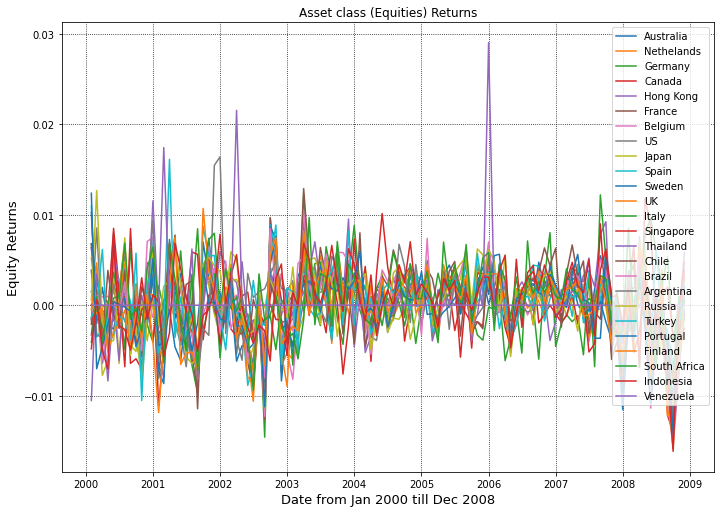

In [70]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Australia_R, label='Australia')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Nethelands_R, label='Nethelands')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Germany_R, label='Germany')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Canada_R, label='Canada')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Hong_Kong_R, label='Hong Kong')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.France_R, label='France')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Belgium_R, label='Belgium')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.US_R, label='US')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Japan_R, label='Japan')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Spain_R, label='Spain')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Sweden_R, label='Sweden')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.UK_R, label='UK')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Italy_R, label='Italy')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Singapore_R, label='Singapore')

plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Thailand_R, label='Thailand')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Chile_R, label='Chile')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Brazil_R, label='Brazil')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Argentina_R, label='Argentina')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Russia_R, label='Russia')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Turkey_R, label='Turkey')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Portugal_R, label='Portugal')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Finland_R, label='Finland')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.South_Africa_R, label='South Africa')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Indonesia_R, label='Indonesia')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Venezuela_R, label='Venezuela')

plt.title('Asset class (Equities) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Equity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [71]:
# Adding up all the returns of all asset classes for all countries

In [72]:
equity_df_2000_2008_2['Portfolio_R'] = equity_df_2000_2008_2['Australia_R'] + equity_df_2000_2008_2['Nethelands_R'] + equity_df_2000_2008_2['Germany_R'] + equity_df_2000_2008_2['Canada_R'] + equity_df_2000_2008_2['Hong_Kong_R'] + equity_df_2000_2008_2['France_R'] + equity_df_2000_2008_2['Belgium_R'] + equity_df_2000_2008_2['US_R'] + equity_df_2000_2008_2['Japan_R'] + equity_df_2000_2008_2['Spain_R'] + equity_df_2000_2008_2['Sweden_R'] + equity_df_2000_2008_2['UK_R'] + equity_df_2000_2008_2['Italy_R'] + equity_df_2000_2008_2['Singapore_R'] + equity_df_2000_2008_2['Thailand_R'] + equity_df_2000_2008_2['Chile_R'] + equity_df_2000_2008_2['Brazil_R'] + equity_df_2000_2008_2['Argentina_R'] + equity_df_2000_2008_2['Russia_R'] + equity_df_2000_2008_2['Turkey_R'] + equity_df_2000_2008_2['Portugal_R'] + equity_df_2000_2008_2['Finland_R'] + equity_df_2000_2008_2['South_Africa_R'] + equity_df_2000_2008_2['Indonesia_R'] + equity_df_2000_2008_2['Venezuela_R']

In [73]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [74]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
equity_df_2000_2008_2['Equity_Port_Value'] = ((equity_df_2000_2008_2['Portfolio_R'] + 1).cumprod())*1000

In [75]:
equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
                       'Singapore_R', 'Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R',
                       'Turkey_R','Portugal_R','Finland_R','South_Africa_R','Indonesia_R',
                       'Venezuela_R', 'Portfolio_R', 'Equity_Port_Value']].head(5)

,Australia_R,Nethelands_R,Germany_R,Canada_R,Hong_Kong_R,France_R,Belgium_R,US_R,Japan_R,Spain_R,...,Argentina_R,Russia_R,Turkey_R,Portugal_R,Finland_R,South_Africa_R,Indonesia_R,Venezuela_R,Portfolio_R,Equity_Port_Value
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,0.001532,0.005203,0.006793,0.006355,0.006260,0.006768,-0.001570,-0.001773,0.001435,0.010983,...,0.003884,0.000545,-0.001370,0.012368,0.000093,-0.004119,-0.004835,-6.759573e-06,0.044592,1044.592448
2000-03-01,0.000296,-0.000184,-0.000339,0.003038,0.000820,0.001108,0.000847,0.008528,0.001264,-0.003515,...,-0.003324,0.012665,-0.000049,-0.007026,-0.000955,0.000919,0.000601,-9.495464e-06,0.023549,1069.191670
2000-04-01,-0.000593,-0.000084,-0.001395,-0.001009,-0.006439,0.001534,0.000934,-0.002715,-0.007760,-0.002660,...,-0.003531,-0.001783,0.006145,-0.004606,-0.000349,-0.004248,-0.004985,6.807074e-07,-0.052156,1013.427200
2000-05-01,-0.001187,-0.000546,-0.002361,-0.000851,-0.003082,0.000073,0.000941,-0.001932,-0.006097,-0.004620,...,-0.002986,-0.004078,-0.004650,-0.002059,-0.005190,0.000078,-0.007069,4.130702e-06,-0.055871,956.805696
2000-06-01,0.007939,0.001559,-0.001707,0.008483,0.005820,0.000228,0.002668,0.002110,0.004409,-0.000682,...,0.002363,-0.003911,-0.003196,0.000339,-0.002880,0.003654,0.006879,-1.608099e-05,0.041770,996.771813


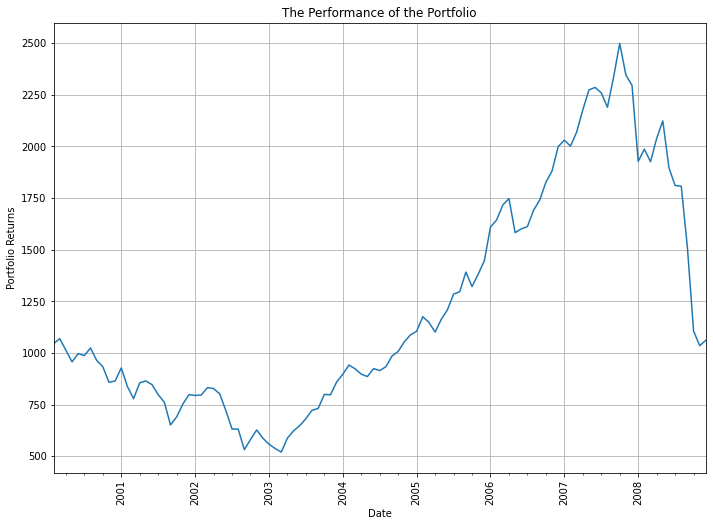

In [76]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date');
plt.ylabel('Portfolio Returns');
equity_df_2000_2008_2['Equity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [77]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(equity_df_2000_2008_2.Equity_Port_Value.max() - equity_df_2000_2008_2.Equity_Port_Value.min()) / equity_df_2000_2008_2.Equity_Port_Value.max()

0.7918388996772519

In [78]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (equity_df_2000_2008_2['Equity_Port_Value'][-1] / equity_df_2000_2008_2['Equity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 1.61%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [79]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
equity_df_2000_2008_2['Monthly_Return'] = equity_df_2000_2008_2['Equity_Port_Value'].pct_change(1)

In [80]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = equity_df_2000_2008_2['Monthly_Return'].mean() / equity_df_2000_2008_2['Monthly_Return'].std()
Sharpe_Ratio

0.036938313945102955

In [81]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(46)
Annualized_Sharpe_Ratio

0.25052783419596597

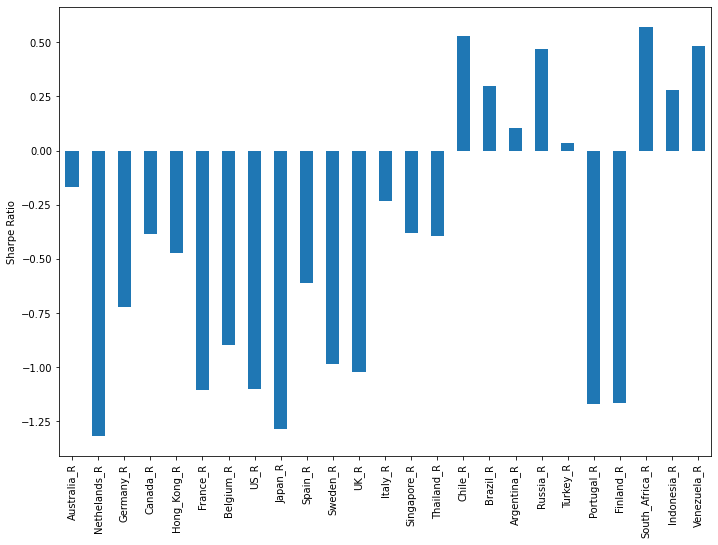

In [82]:
# Calcualte the Sharpe Ratio for equity portfolio
def equity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sharpes = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
equity_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

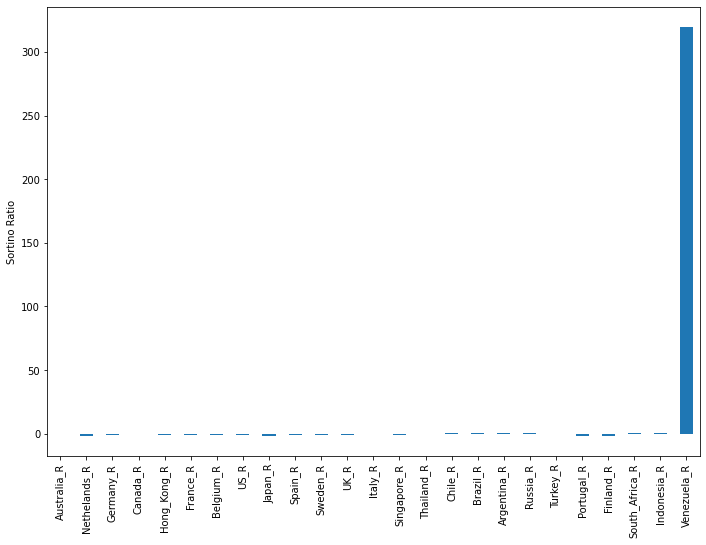

In [83]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sortinos = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
equity_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

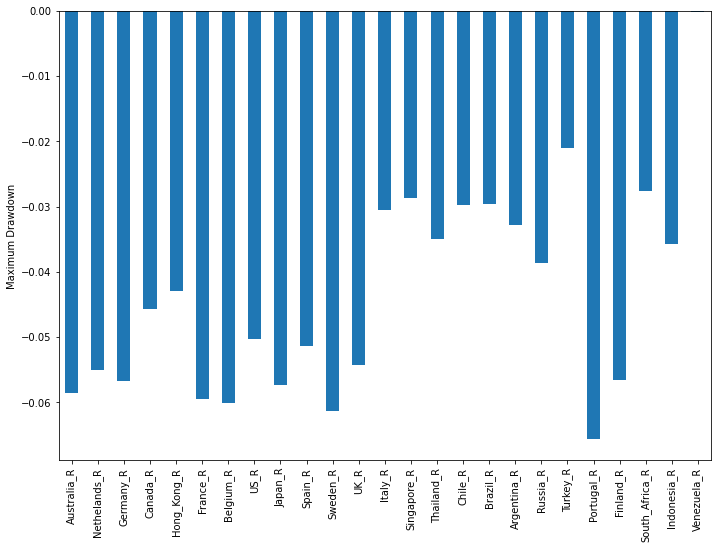

In [84]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def equity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_max_drawdown = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
equity_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2008.
- Target volatility 4 %.
- Maximum Drawdown 7.91 %.
- Cumulative return of the of portfolio 1.61 %
- Sharpe Ratio 3.69 %.


In [85]:
# Dataset (Commodity.csv) from Master Equity Portfolio Excel file
# Dataset includes: Gold, WTI (West Texas Intermediate Crude Oil), Heat Oil, Natural Gas, Silver, US Coffee,
# US Corn, Wheat, Copper, Platinum, and Cocoa

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
commodity_df_2000_2008 = pd.read_csv('Commodity_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(commodity_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
commodity_df_2000_2008.head()

(108, 12)


,Date,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
0,1/1/2000,283.2,27.64,1.95,2662.0,5287.0,111.1,220.00,256.25,0.84,971.4,2541.0
1,2/1/2000,292.4,30.43,1.87,2761.0,5048.0,99.9,215.00,247.00,0.79,900.4,2588.0
2,3/1/2000,278.4,26.90,1.84,2945.0,5020.0,103.7,236.00,262.25,0.80,933.7,2455.0
3,4/1/2000,273.1,25.74,1.84,3141.0,4960.0,95.3,223.75,242.25,0.79,883.4,2451.0
4,5/1/2000,271.7,29.01,1.82,4356.0,4941.0,93.0,225.00,274.75,0.81,931.7,2238.0


In [86]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         108 non-null    object 
 1   Gold         108 non-null    float64
 2   WTI          108 non-null    float64
 3   Heat_Oil     108 non-null    float64
 4   Natural_Gas  108 non-null    float64
 5   Silver       108 non-null    float64
 6   US_Coffee    108 non-null    float64
 7   US_Corn      108 non-null    float64
 8   Wheat        108 non-null    float64
 9   Copper       108 non-null    float64
 10  Platinum     108 non-null    float64
 11  Cocoa        108 non-null    float64
dtypes: float64(11), object(1)
memory usage: 10.2+ KB


In [87]:
# Use pandas.to_datetime() function to convert argument to datetime
commodity_df_2000_2008['Date'] = pd.to_datetime(commodity_df_2000_2008.Date)

In [88]:
# Use pandas.DataFrame.astype() function to casta pandas object to a specified data type
commodity_df_2000_2008['Natural_Gas'] = commodity_df_2000_2008['Natural_Gas'].astype(float)
commodity_df_2000_2008['Silver'] = commodity_df_2000_2008['Silver'].astype(float)
commodity_df_2000_2008['Copper'] = commodity_df_2000_2008['Copper'].astype(float)
commodity_df_2000_2008['Cocoa'] = commodity_df_2000_2008['Cocoa'].astype(float)

In [89]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         108 non-null    datetime64[ns]
 1   Gold         108 non-null    float64       
 2   WTI          108 non-null    float64       
 3   Heat_Oil     108 non-null    float64       
 4   Natural_Gas  108 non-null    float64       
 5   Silver       108 non-null    float64       
 6   US_Coffee    108 non-null    float64       
 7   US_Corn      108 non-null    float64       
 8   Wheat        108 non-null    float64       
 9   Copper       108 non-null    float64       
 10  Platinum     108 non-null    float64       
 11  Cocoa        108 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 10.2 KB


In [90]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
commodity_df_2000_2008.set_index('Date',inplace=True)

In [91]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
commodity_df_2000_2008.isnull().any()

Gold           False
WTI            False
Heat_Oil       False
Natural_Gas    False
Silver         False
US_Coffee      False
US_Corn        False
Wheat          False
Copper         False
Platinum       False
Cocoa          False
dtype: bool

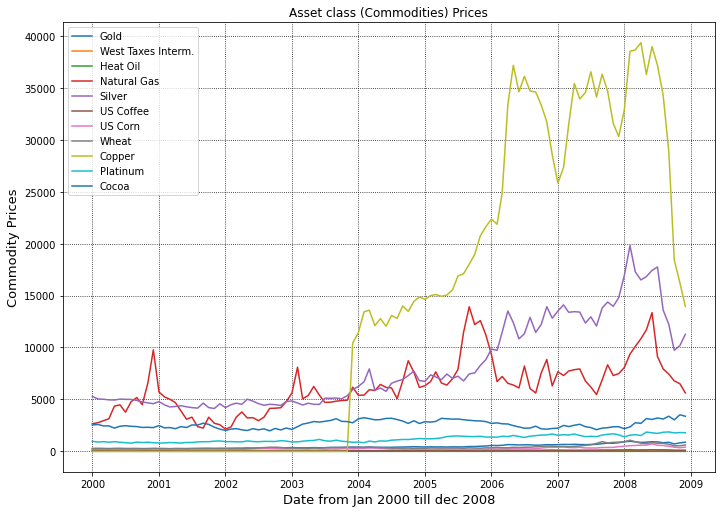

In [92]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Gold, label='Gold')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Silver, label='Silver')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.US_Corn, label='US Corn')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Wheat, label='Wheat')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Copper, label='Copper')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Platinum, label='Platinum')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Cocoa, label='Cocoa')

plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2000 till dec 2008', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

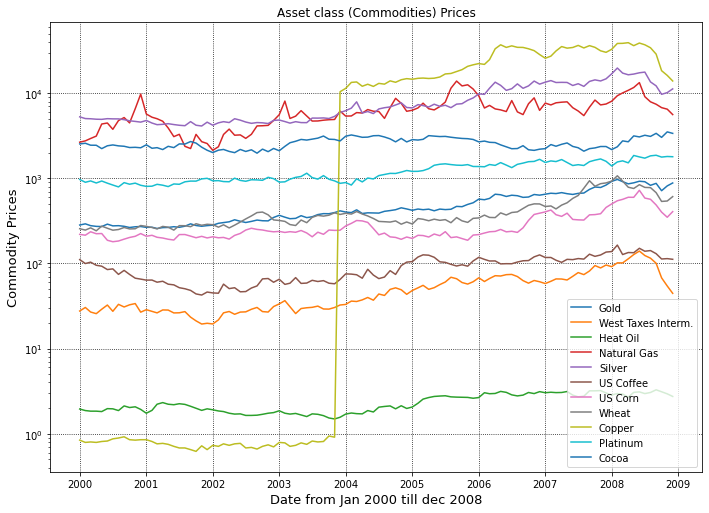

In [93]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Gold, label='Gold')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Silver, label='Silver')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.US_Corn, label='US Corn')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Wheat, label='Wheat')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Copper, label='Copper')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Platinum, label='Platinum')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Cocoa, label='Cocoa')

plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2000 till dec 2008', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [94]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
commodity_df_2000_2008 = commodity_df_2000_2008[['Gold','WTI','Heat_Oil','Natural_Gas','Silver','US_Coffee',
                                                 'US_Corn','Wheat','Copper','Platinum','Cocoa']].pct_change()
commodity_df_2000_2008.head(5)

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
Date,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.032486,0.100941,-0.041026,0.037190,-0.045205,-0.100810,-0.022727,-0.036098,-0.059524,-0.073090,0.018497
2000-03-01,-0.047880,-0.116004,-0.016043,0.066643,-0.005547,0.038038,0.097674,0.061741,0.012658,0.036984,-0.051391
2000-04-01,-0.019037,-0.043123,0.000000,0.066553,-0.011952,-0.081003,-0.051907,-0.076263,-0.012500,-0.053872,-0.001629
2000-05-01,-0.005126,0.127040,-0.010870,0.386819,-0.003831,-0.024134,0.005587,0.134159,0.025316,0.054675,-0.086903


In [95]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
commodity_df_2000_2008.dropna(axis=0, inplace=True)
commodity_df_2000_2008.head(5)

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
Date,,,,,,,,,,,
2000-02-01,0.032486,0.100941,-0.041026,0.037190,-0.045205,-0.100810,-0.022727,-0.036098,-0.059524,-0.073090,0.018497
2000-03-01,-0.047880,-0.116004,-0.016043,0.066643,-0.005547,0.038038,0.097674,0.061741,0.012658,0.036984,-0.051391
2000-04-01,-0.019037,-0.043123,0.000000,0.066553,-0.011952,-0.081003,-0.051907,-0.076263,-0.012500,-0.053872,-0.001629
2000-05-01,-0.005126,0.127040,-0.010870,0.386819,-0.003831,-0.024134,0.005587,0.134159,0.025316,0.054675,-0.086903
2000-06-01,0.067722,0.120303,0.082418,0.027548,0.018620,-0.087634,-0.166667,-0.055505,0.012346,-0.056671,0.079982


In [96]:
print('There are {} rows in the DataFrame'.format(commodity_df_2000_2008.shape[0]))

There are 107 rows in the DataFrame


In [97]:
# Use pandas.DataFrame.copy() function to make a copy of commodity_df
commodity_df_2000_2008_2 = commodity_df_2000_2008.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [98]:
vol_com_df_2000_2008 = commodity_df_2000_2008

In [99]:
vol_com_df_2000_2008.shape[0]

107

In [100]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_com_df_2000_2008['Gold_Vol'] = vol_com_df_2000_2008['Gold'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['WTI_Vol'] = vol_com_df_2000_2008['WTI'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Heat_Oil_Vol'] = vol_com_df_2000_2008['Heat_Oil'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Natural_Gas_Vol'] = vol_com_df_2000_2008['Natural_Gas'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Silver_Vol'] = vol_com_df_2000_2008['Silver'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['US_Coffee_Vol'] = vol_com_df_2000_2008['US_Coffee'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['US_Corn_Vol'] = vol_com_df_2000_2008['US_Corn'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Wheat_Vol'] = vol_com_df_2000_2008['Wheat'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Copper_Vol'] = vol_com_df_2000_2008['Copper'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Platinum_Vol'] = vol_com_df_2000_2008['Platinum'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Cocoa_Vol'] = vol_com_df_2000_2008['Cocoa'].rolling(107).std() * math.sqrt(107)

In [101]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_com_df_2000_2008.dropna(axis=0, inplace=True)

In [102]:
vol_com_df_2000_2008[['Gold_Vol','WTI_Vol','Heat_Oil_Vol','Natural_Gas_Vol','Silver_Vol','US_Coffee_Vol','US_Corn_Vol',
                      'Wheat_Vol','Copper_Vol','Platinum_Vol','Cocoa_Vol']]

,Gold_Vol,WTI_Vol,Heat_Oil_Vol,Natural_Gas_Vol,Silver_Vol,US_Coffee_Vol,US_Corn_Vol,Wheat_Vol,Copper_Vol,Platinum_Vol,Cocoa_Vol
Date,,,,,,,,,,,
2008-12-01,0.505356,1.022685,0.592443,1.949361,0.852281,0.978744,0.880857,0.85981,11460.531222,0.639895,0.677275


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [103]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility_com = (0.505356+1.022685+0.592443+1.949361+0.852281+0.978744+0.880857+0.85981+11460.531222+0.639895+0.677275) / 11
volatility_com

1042.6809026363635

In [104]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
commodity_target_vol = 1 / 11
commodity_target_vol

0.09090909090909091

In [105]:
# Create a new dataframe called commodity_portfolio_df which calculates the allocation to each asset class 
port_com_df_2000_2008 = commodity_df_2000_2008

In [106]:
port_com_df_2000_2008['Gold_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Gold_Vol']
port_com_df_2000_2008['WTI_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['WTI_Vol']
port_com_df_2000_2008['Heat_Oil_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Heat_Oil_Vol']
port_com_df_2000_2008['Natural_Gas_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Natural_Gas_Vol']
port_com_df_2000_2008['Silver_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Silver_Vol']
port_com_df_2000_2008['US_Coffee_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['US_Coffee_Vol']
port_com_df_2000_2008['US_Corn_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['US_Corn_Vol']
port_com_df_2000_2008['Wheat_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Wheat_Vol']
port_com_df_2000_2008['Copper_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Copper_Vol']
port_com_df_2000_2008['Platinum_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Platinum_Vol']
port_com_df_2000_2008['Cocoa_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Cocoa_Vol']

In [107]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_com_df_2000_2008.dropna(axis=0, inplace=True)

In [108]:
port_com_df_2000_2008[['Gold_Alloc','WTI_Alloc','Heat_Oil_Alloc','Natural_Gas_Alloc','Silver_Alloc',
                        'US_Coffee_Alloc','US_Corn_Alloc','Wheat_Alloc','Copper_Alloc','Platinum_Alloc','Cocoa_Alloc']]

,Gold_Alloc,WTI_Alloc,Heat_Oil_Alloc,Natural_Gas_Alloc,Silver_Alloc,US_Coffee_Alloc,US_Corn_Alloc,Wheat_Alloc,Copper_Alloc,Platinum_Alloc,Cocoa_Alloc
Date,,,,,,,,,,,
2008-12-01,0.179891,0.088893,0.153448,0.046635,0.106666,0.092883,0.103205,0.105732,0.000008,0.142069,0.134228


In [109]:
# I will multiply the monthly commodity prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (Commodity)

In [110]:
commodity_df_2000_2008_2['Gold_R'] = commodity_df_2000_2008_2['Gold'] * 0.179891
commodity_df_2000_2008_2['WTI_R'] = commodity_df_2000_2008_2['WTI'] * 0.088893
commodity_df_2000_2008_2['Heat_Oil_R'] = commodity_df_2000_2008_2['Heat_Oil'] * 0.153448
commodity_df_2000_2008_2['Natural_Gas_R'] = commodity_df_2000_2008_2['Natural_Gas'] * 0.046635
commodity_df_2000_2008_2['Silver_R'] = commodity_df_2000_2008_2['Silver'] * 0.106666
commodity_df_2000_2008_2['US_Coffee_R'] = commodity_df_2000_2008_2['US_Coffee'] * 0.092883
commodity_df_2000_2008_2['US_Corn_R'] = commodity_df_2000_2008_2['US_Corn'] * 0.103205
commodity_df_2000_2008_2['Wheat_R'] = commodity_df_2000_2008_2['Wheat'] * 0.105732
commodity_df_2000_2008_2['Copper_R'] = commodity_df_2000_2008_2['Copper'] * 0.000008
commodity_df_2000_2008_2['Platinum_R'] = commodity_df_2000_2008_2['Platinum'] * 0.142069
commodity_df_2000_2008_2['Cocoa_R'] = commodity_df_2000_2008_2['Cocoa'] * 0.134228

In [111]:
commodity_df_2000_2008_2.head(5)

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,...,WTI_R,Heat_Oil_R,Natural_Gas_R,Silver_R,US_Coffee_R,US_Corn_R,Wheat_R,Copper_R,Platinum_R,Cocoa_R
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,0.032486,0.100941,-0.041026,0.037190,-0.045205,-0.100810,-0.022727,-0.036098,-0.059524,-0.073090,...,0.008973,-0.006295,0.001734,-0.004822,-0.009364,-0.002346,-0.003817,-4.761905e-07,-0.010384,0.002483
2000-03-01,-0.047880,-0.116004,-0.016043,0.066643,-0.005547,0.038038,0.097674,0.061741,0.012658,0.036984,...,-0.010312,-0.002462,0.003108,-0.000592,0.003533,0.010080,0.006528,1.012658e-07,0.005254,-0.006898
2000-04-01,-0.019037,-0.043123,0.000000,0.066553,-0.011952,-0.081003,-0.051907,-0.076263,-0.012500,-0.053872,...,-0.003833,0.000000,0.003104,-0.001275,-0.007524,-0.005357,-0.008063,-1.000000e-07,-0.007653,-0.000219
2000-05-01,-0.005126,0.127040,-0.010870,0.386819,-0.003831,-0.024134,0.005587,0.134159,0.025316,0.054675,...,0.011293,-0.001668,0.018039,-0.000409,-0.002242,0.000577,0.014185,2.025316e-07,0.007768,-0.011665
2000-06-01,0.067722,0.120303,0.082418,0.027548,0.018620,-0.087634,-0.166667,-0.055505,0.012346,-0.056671,...,0.010694,0.012647,0.001285,0.001986,-0.008140,-0.017201,-0.005869,9.876543e-08,-0.008051,0.010736


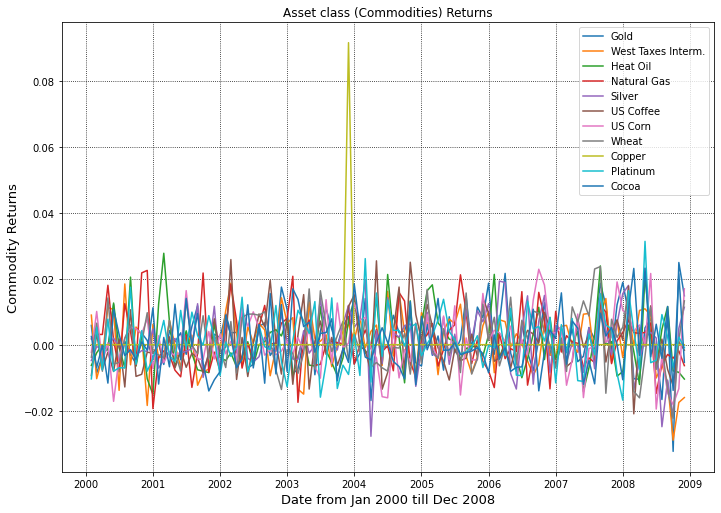

In [112]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Gold_R, label='Gold')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.WTI_R, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Heat_Oil_R, label='Heat Oil')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Natural_Gas_R, label='Natural Gas')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Silver_R, label='Silver')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.US_Coffee_R, label='US Coffee')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.US_Corn_R, label='US Corn')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Wheat_R, label='Wheat')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Copper_R, label='Copper')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Platinum_R, label='Platinum')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Cocoa_R, label='Cocoa')

plt.title('Asset class (Commodities) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Commodity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [113]:
# Adding up all the returns of all asset classes for all commodities

In [114]:
commodity_df_2000_2008_2['Portfolio_R'] = commodity_df_2000_2008_2['Gold_R'] + commodity_df_2000_2008_2['WTI_R'] + commodity_df_2000_2008_2['Heat_Oil_R'] + commodity_df_2000_2008_2['Natural_Gas_R'] + commodity_df_2000_2008_2['Silver_R'] + commodity_df_2000_2008_2['US_Coffee_R'] + commodity_df_2000_2008_2['US_Corn_R'] + commodity_df_2000_2008_2['Wheat_R'] + commodity_df_2000_2008_2['Copper_R'] + commodity_df_2000_2008_2['Platinum_R'] + commodity_df_2000_2008_2['Cocoa_R']

In [115]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [116]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
commodity_df_2000_2008_2['Commodity_Port_Value'] = ((commodity_df_2000_2008_2['Portfolio_R'] + 1).cumprod())*1000

In [117]:
commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
                          'Wheat_R','Copper_R','Platinum_R','Cocoa_R','Portfolio_R', 'Commodity_Port_Value']].head(5)

,Gold_R,WTI_R,Heat_Oil_R,Natural_Gas_R,Silver_R,US_Coffee_R,US_Corn_R,Wheat_R,Copper_R,Platinum_R,Cocoa_R,Portfolio_R,Commodity_Port_Value
Date,,,,,,,,,,,,,
2000-02-01,0.005844,0.008973,-0.006295,0.001734,-0.004822,-0.009364,-0.002346,-0.003817,-4.761905e-07,-0.010384,0.002483,-0.017993,982.006669
2000-03-01,-0.008613,-0.010312,-0.002462,0.003108,-0.000592,0.003533,0.010080,0.006528,1.012658e-07,0.005254,-0.006898,-0.000373,981.640584
2000-04-01,-0.003425,-0.003833,0.000000,0.003104,-0.001275,-0.007524,-0.005357,-0.008063,-1.000000e-07,-0.007653,-0.000219,-0.034246,948.023610
2000-05-01,-0.000922,0.011293,-0.001668,0.018039,-0.000409,-0.002242,0.000577,0.014185,2.025316e-07,0.007768,-0.011665,0.034956,981.163047
2000-06-01,0.012183,0.010694,0.012647,0.001285,0.001986,-0.008140,-0.017201,-0.005869,9.876543e-08,-0.008051,0.010736,0.010270,991.239436


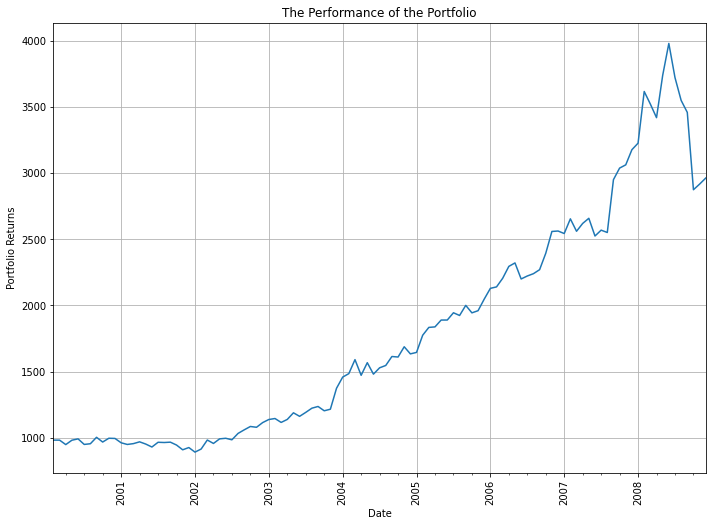

In [118]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
commodity_df_2000_2008_2['Commodity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [119]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(commodity_df_2000_2008_2.Commodity_Port_Value.max() - commodity_df_2000_2008_2.Commodity_Port_Value.min()) / commodity_df_2000_2008_2.Commodity_Port_Value.max()

0.7761464818476083

In [120]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (commodity_df_2000_2008_2['Commodity_Port_Value'][-1] / commodity_df_2000_2008_2['Commodity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 201.76%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [121]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
commodity_df_2000_2008_2['Monthly_Return'] = commodity_df_2000_2008_2['Commodity_Port_Value'].pct_change(1)

In [122]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = commodity_df_2000_2008_2['Monthly_Return'].mean() / commodity_df_2000_2008_2['Monthly_Return'].std()
Sharpe_Ratio

0.26401880902554914

In [123]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(107)
Annualized_Sharpe_Ratio

2.7310317963293333

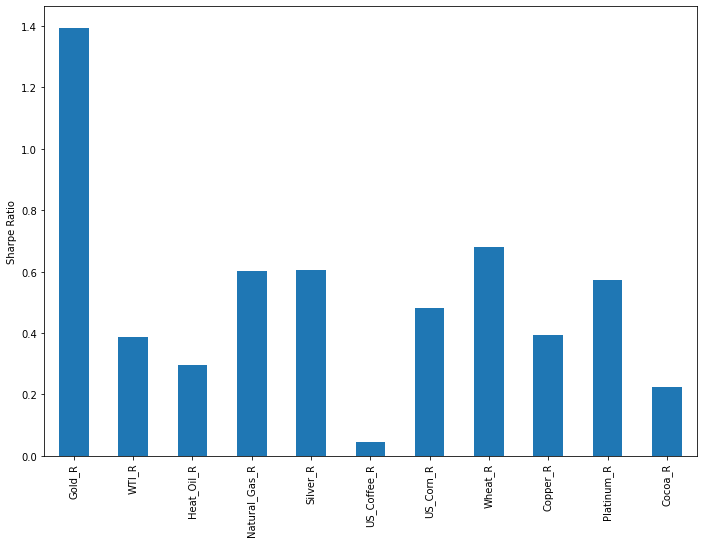

In [124]:
# Calcualte the Sharpe Ratio for commodity portfolio
def commodity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sharpes = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
commodity_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

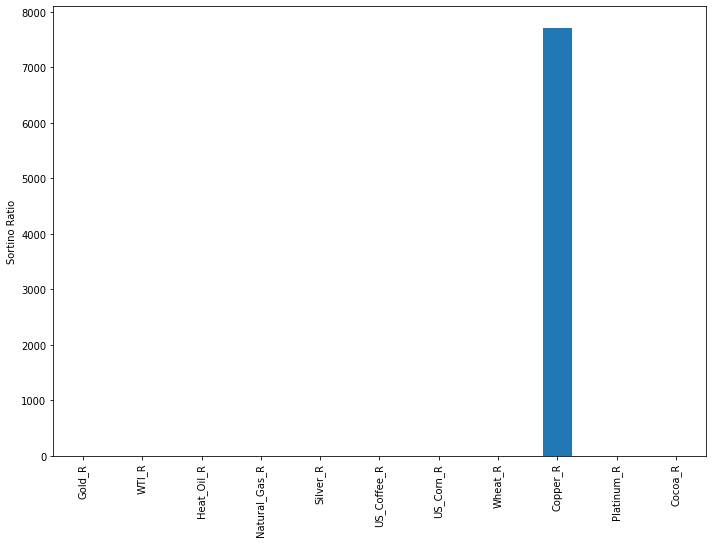

In [125]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sortinos = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
commodity_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

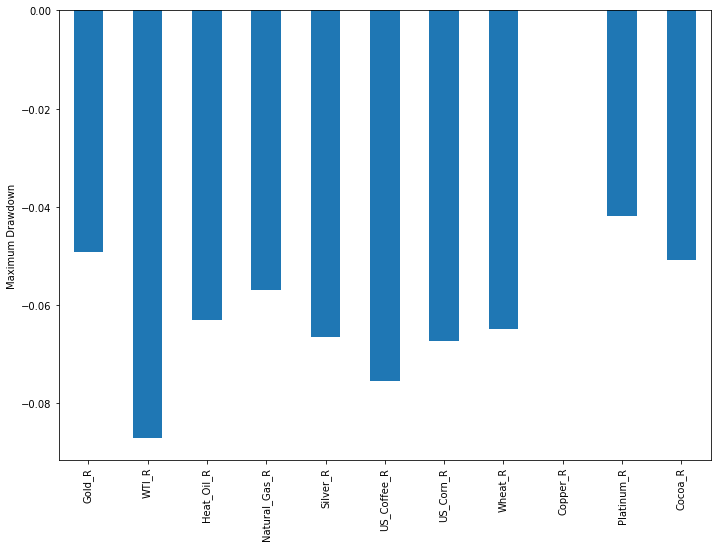

In [126]:
# Calcualte the Maximum Drawdown (MDD) for commodity portfolio
def commodity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_max_drawdown = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
commodity_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2008.
- Target volatility 9 %.
- Maximum Drawdown 77 %.
- Cumulative return of the of portfolio 201 %
- Sharpe Ratio 26.40 %.


In [127]:
# Dataset (Currency.csv) from Master Equity Portfolio Excel file
# We have five different currency:Australian dollar (AUD), Euro, Canadian dollar (CAD), Japanese yen (JPY),
# and British pound sterling (GBP.)

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
currency_df_2000_2008 = pd.read_csv('Currency_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(currency_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
currency_df_2000_2008.head()

(108, 6)


,Date,AUD,EURO,CAD,JPY,GBP
0,1/1/2000,1.42,0.89,1.30,108.68,0.76
1,2/1/2000,1.48,0.91,1.33,109.51,0.77
2,3/1/2000,1.45,0.90,1.32,108.08,0.77
3,4/1/2000,1.48,0.92,1.32,108.09,0.81
4,5/1/2000,1.49,0.91,1.33,106.22,0.82


In [128]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    108 non-null    object 
 1   AUD     108 non-null    float64
 2   EURO    108 non-null    float64
 3   CAD     108 non-null    float64
 4   JPY     108 non-null    float64
 5   GBP     108 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.2+ KB


In [129]:
# Use pandas.to_datetime() function to convert argument to datetime
currency_df_2000_2008['Date'] = pd.to_datetime(currency_df_2000_2008.Date)

In [130]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    108 non-null    datetime64[ns]
 1   AUD     108 non-null    float64       
 2   EURO    108 non-null    float64       
 3   CAD     108 non-null    float64       
 4   JPY     108 non-null    float64       
 5   GBP     108 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 5.2 KB


In [131]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
currency_df_2000_2008.set_index('Date',inplace=True)

In [132]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
currency_df_2000_2008.isnull().any()

AUD     False
EURO    False
CAD     False
JPY     False
GBP     False
dtype: bool

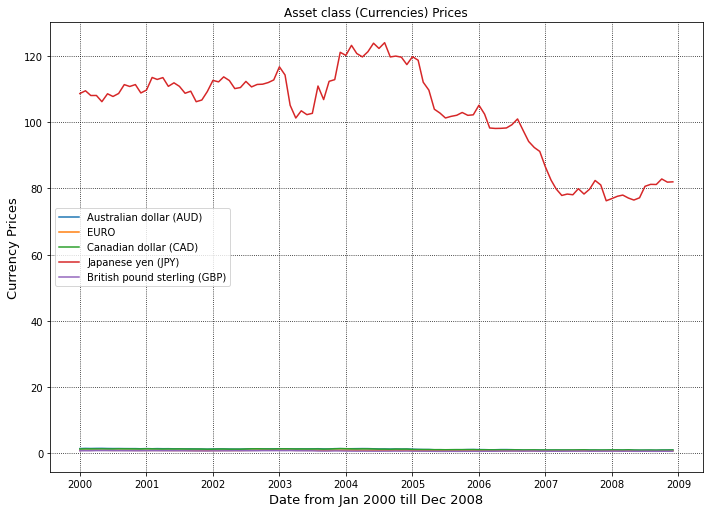

In [133]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.EURO, label='EURO')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.GBP, label='British pound sterling (GBP)')

plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

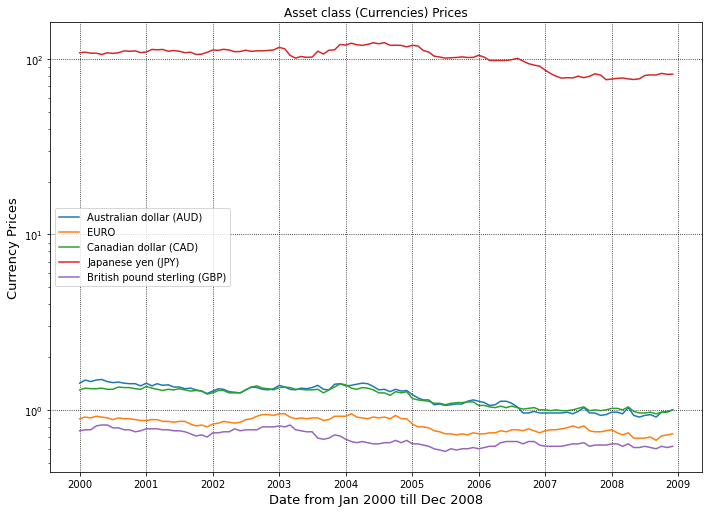

In [134]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.EURO, label='EURO')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.GBP, label='British pound sterling (GBP)')

plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [135]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
currency_df_2000_2008 = currency_df_2000_2008[['AUD','EURO','CAD','JPY','GBP']].pct_change()
currency_df_2000_2008.head(5)

,AUD,EURO,CAD,JPY,GBP
Date,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.042254,0.022472,0.023077,0.007637,0.013158
2000-03-01,-0.020270,-0.010989,-0.007519,-0.013058,0.000000
2000-04-01,0.020690,0.022222,0.000000,0.000093,0.051948
2000-05-01,0.006757,-0.010870,0.007576,-0.017300,0.012346


In [136]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
currency_df_2000_2008.dropna(axis=0, inplace=True)
currency_df_2000_2008.head(5)

,AUD,EURO,CAD,JPY,GBP
Date,,,,,
2000-02-01,0.042254,0.022472,0.023077,0.007637,0.013158
2000-03-01,-0.020270,-0.010989,-0.007519,-0.013058,0.000000
2000-04-01,0.020690,0.022222,0.000000,0.000093,0.051948
2000-05-01,0.006757,-0.010870,0.007576,-0.017300,0.012346
2000-06-01,-0.026846,-0.010989,-0.015038,0.022406,0.000000


In [137]:
print('There are {} rows in the DataFrame'.format(currency_df_2000_2008.shape[0]))

There are 107 rows in the DataFrame


In [138]:
# Use pandas.DataFrame.copy() function to make a copy of currency_df
currency_df_2000_2008_2 = currency_df_2000_2008.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [139]:
vol_curr_df_2000_2008 = currency_df_2000_2008

In [140]:
vol_curr_df_2000_2008.shape[0]

107

In [141]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_curr_df_2000_2008['AUD_Vol'] = vol_curr_df_2000_2008['AUD'].rolling(107).std() * math.sqrt(107)
vol_curr_df_2000_2008['EURO_Vol'] = vol_curr_df_2000_2008['EURO'].rolling(107).std() * math.sqrt(107)
vol_curr_df_2000_2008['CAD_Vol'] = vol_curr_df_2000_2008['CAD'].rolling(107).std() * math.sqrt(107)
vol_curr_df_2000_2008['JPY_Vol'] = vol_curr_df_2000_2008['JPY'].rolling(107).std() * math.sqrt(107)
vol_curr_df_2000_2008['GBP_Vol'] = vol_curr_df_2000_2008['GBP'].rolling(107).std() * math.sqrt(107)

In [142]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_curr_df_2000_2008.dropna(axis=0, inplace=True)

In [143]:
vol_curr_df_2000_2008[['AUD_Vol','EURO_Vol','CAD_Vol','JPY_Vol','GBP_Vol']]

,AUD_Vol,EURO_Vol,CAD_Vol,JPY_Vol,GBP_Vol
Date,,,,,
2008-12-01,0.315677,0.248327,0.241576,0.260031,0.247969


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy that focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, the Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that the RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [144]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_curr = (0.315677+0.248327+0.241576+0.260031+0.247969) / 5
Avg_vol_curr

0.262716

In [145]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
curr_target_vol = 0.262716 / 5
curr_target_vol

0.0525432

In [146]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_curr_df_2000_2008 = currency_df_2000_2008

In [147]:
port_curr_df_2000_2008['AUD_Alloc'] = curr_target_vol / vol_curr_df_2000_2008['AUD_Vol'] 
port_curr_df_2000_2008['EURO_Alloc'] = curr_target_vol / vol_curr_df_2000_2008['EURO_Vol'] 
port_curr_df_2000_2008['CAD_Alloc'] = curr_target_vol / vol_curr_df_2000_2008['CAD_Vol'] 
port_curr_df_2000_2008['JPY_Alloc'] = curr_target_vol / vol_curr_df_2000_2008['JPY_Vol'] 
port_curr_df_2000_2008['GBP_Alloc'] = curr_target_vol / vol_curr_df_2000_2008['GBP_Vol'] 

In [148]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_curr_df_2000_2008.dropna(axis=0, inplace=True)

In [149]:
port_curr_df_2000_2008[['AUD_Alloc','EURO_Alloc','CAD_Alloc','JPY_Alloc','GBP_Alloc']]

,AUD_Alloc,EURO_Alloc,CAD_Alloc,JPY_Alloc,GBP_Alloc
Date,,,,,
2008-12-01,0.166446,0.211589,0.217501,0.202065,0.211894


In [150]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (currencies)

In [151]:
currency_df_2000_2008_2['AUD_R'] = currency_df_2000_2008_2['AUD'] * 0.166446
currency_df_2000_2008_2['EURO_R'] = currency_df_2000_2008_2['EURO'] * 0.211589
currency_df_2000_2008_2['CAD_R'] = currency_df_2000_2008_2['CAD'] * 0.217501
currency_df_2000_2008_2['JPY_R'] = currency_df_2000_2008_2['JPY'] * 0.202065
currency_df_2000_2008_2['GBP_R'] = currency_df_2000_2008_2['GBP'] * 0.211894

In [152]:
currency_df_2000_2008_2.head(5)

,AUD,EURO,CAD,JPY,GBP,AUD_R,EURO_R,CAD_R,JPY_R,GBP_R
Date,,,,,,,,,,
2000-02-01,0.042254,0.022472,0.023077,0.007637,0.013158,0.007033,0.004755,0.005019,0.001543,0.002788
2000-03-01,-0.020270,-0.010989,-0.007519,-0.013058,0.000000,-0.003374,-0.002325,-0.001635,-0.002639,0.000000
2000-04-01,0.020690,0.022222,0.000000,0.000093,0.051948,0.003444,0.004702,0.000000,0.000019,0.011007
2000-05-01,0.006757,-0.010870,0.007576,-0.017300,0.012346,0.001125,-0.002300,0.001648,-0.003496,0.002616
2000-06-01,-0.026846,-0.010989,-0.015038,0.022406,0.000000,-0.004468,-0.002325,-0.003271,0.004528,0.000000


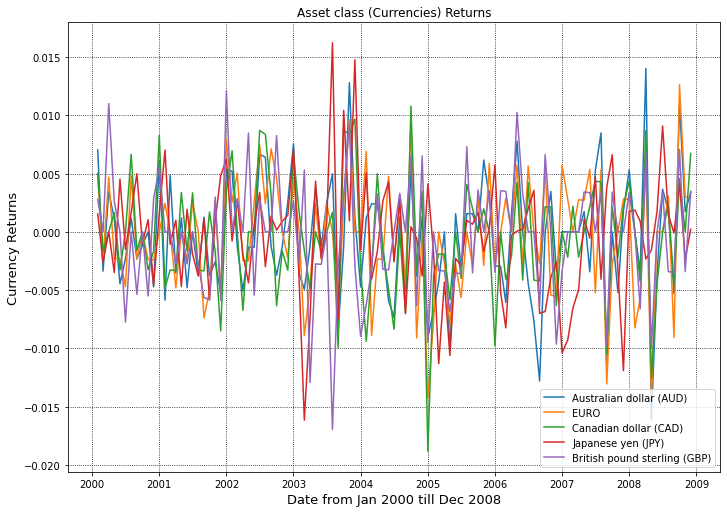

In [153]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2008_2.index, currency_df_2000_2008_2.AUD_R, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2008_2.index, currency_df_2000_2008_2.EURO_R, label='EURO')
plt.plot(currency_df_2000_2008_2.index, currency_df_2000_2008_2.CAD_R, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2008_2.index, currency_df_2000_2008_2.JPY_R, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2008_2.index, currency_df_2000_2008_2.GBP_R, label='British pound sterling (GBP)')

plt.title('Asset class (Currencies) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Currency Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

In [154]:
# Adding up all the returns of all asset classes for all currencies (AUD, EURO, CAD, JPY, and GBP)

In [155]:
currency_df_2000_2008_2['Portfolio_R'] = currency_df_2000_2008_2['AUD_R'] + currency_df_2000_2008_2['EURO_R'] + currency_df_2000_2008_2['CAD_R'] + currency_df_2000_2008_2['JPY_R'] + currency_df_2000_2008_2['GBP_R']

In [156]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [157]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
currency_df_2000_2008_2['Currency_Port_Value'] = ((currency_df_2000_2008_2['Portfolio_R'] + 1).cumprod())*1000

In [158]:
currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R','Portfolio_R', 'Currency_Port_Value']].head(5)

,AUD_R,EURO_R,CAD_R,JPY_R,GBP_R,Portfolio_R,Currency_Port_Value
Date,,,,,,,
2000-02-01,0.007033,0.004755,0.005019,0.001543,0.002788,0.021138,1021.138262
2000-03-01,-0.003374,-0.002325,-0.001635,-0.002639,0.000000,-0.009973,1010.954446
2000-04-01,0.003444,0.004702,0.000000,0.000019,0.011007,0.019172,1030.336328
2000-05-01,0.001125,-0.002300,0.001648,-0.003496,0.002616,-0.000407,1029.916631
2000-06-01,-0.004468,-0.002325,-0.003271,0.004528,0.000000,-0.005537,1024.214332


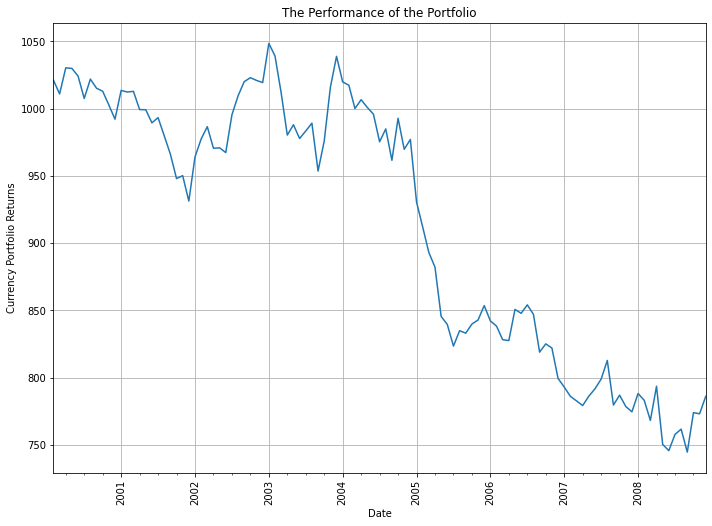

In [159]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2000 till Dec 2008')
plt.ylabel('Currency Portfolio Returns')
currency_df_2000_2008_2['Currency_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [160]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
# (currency_df_2.Portfolio_Value.max() - currency_df_2.Portfolio_Value.min()) / currency_df_2.Portfolio_Value.max()
print("The Maximum Drawdown (MDD) of the Portfolio is {:.2f} %".format((currency_df_2000_2008_2.Currency_Port_Value.max() - currency_df_2000_2008_2.Currency_Port_Value.min()) / currency_df_2000_2008_2.Currency_Port_Value.max()
))

The Maximum Drawdown (MDD) of the Portfolio is 0.29 %


In [161]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (currency_df_2000_2008_2['Currency_Port_Value'][-1] / currency_df_2000_2008_2['Currency_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f} %".format(cumulative_return))

The Cumulative Return of the Portfolio is -23.03 %


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [162]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
currency_df_2000_2008_2['Monthly_Return'] = currency_df_2000_2008_2['Currency_Port_Value'].pct_change(1)

In [163]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = currency_df_2000_2008_2['Monthly_Return'].mean() / currency_df_2000_2008_2['Monthly_Return'].std()
Sharpe_Ratio

-0.12625923635006125

In [164]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(107)
Annualized_Sharpe_Ratio

-1.3060356961875

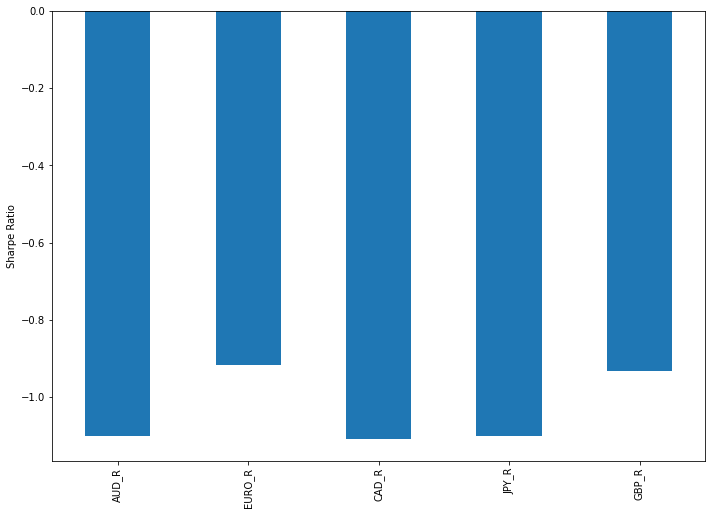

In [165]:
# Calcualte the Sharpe Ratio for currency portfolio
def currency_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sharpes = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
currency_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

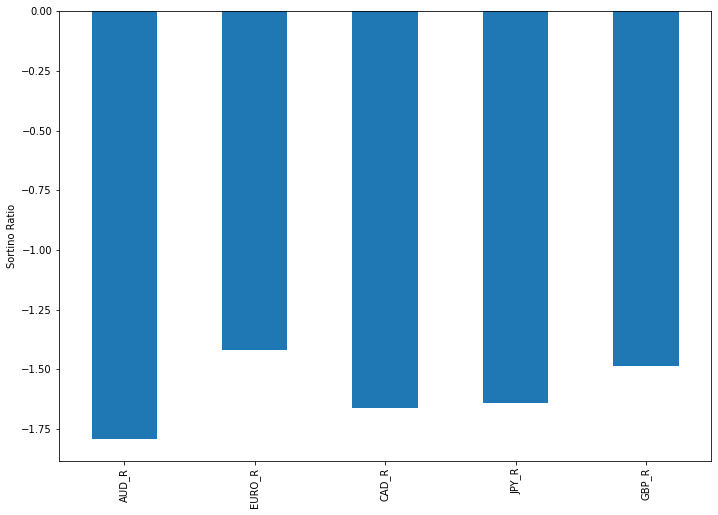

In [166]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sortinos = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
currency_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

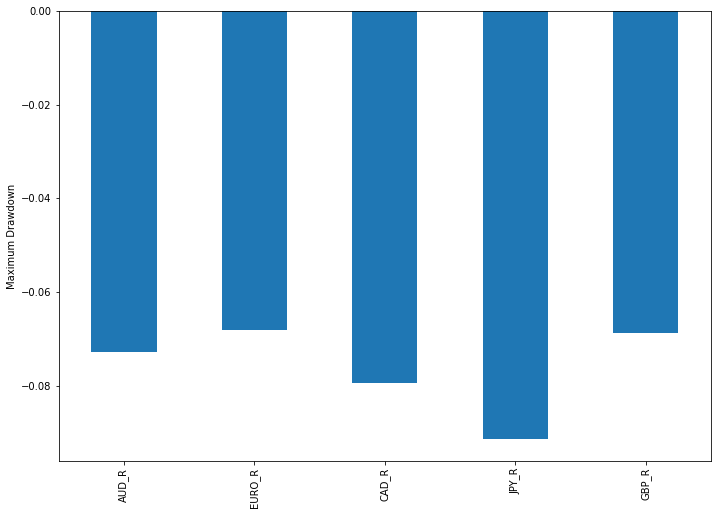

In [167]:
# Calcualte the Maximum Drawdown (MDD) for currency portfolio
def currency_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_max_drawdown = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
currency_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2008.
- Target volatility 5.25 %.
- Maximum Drawdown - 0.29 %.
- Cumulative return of the of portfolio -23.03 %
- Sharpe Ratio -12.62 %.

In [168]:
# Dataset Industry Portfolio contains the monthly weighted average returns of industry portfolio
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
industry_portfolio_df_2000_2008 = pd.read_csv('Industry_Portfolio_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(industry_portfolio_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
industry_portfolio_df_2000_2008.head()

(108, 11)


,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,1/1/2000,-4.77,-0.87,-7.99,0.90,-4.71,-4.04,-11.23,7.56,5.75,-4.64
1,2/1/2000,-6.19,-7.95,-4.24,-5.44,18.18,-3.59,-3.86,-2.88,-7.26,-6.98
2,3/1/2000,7.74,10.51,8.36,12.26,3.95,7.57,13.28,0.28,5.77,14.12
3,4/1/2000,-1.82,9.27,0.96,-1.98,-10.69,-7.90,-4.27,5.25,7.60,-3.41
4,5/1/2000,7.22,-13.22,-1.41,9.44,-10.84,-10.41,-2.70,3.94,3.90,3.46


In [169]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
industry_portfolio_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    108 non-null    object 
 1   NoDur   108 non-null    float64
 2   Durbl   108 non-null    float64
 3   Manuf   108 non-null    float64
 4   Enrgy   108 non-null    float64
 5   HiTec   108 non-null    float64
 6   Telcm   108 non-null    float64
 7   Shops   108 non-null    float64
 8   Hlth    108 non-null    float64
 9   Utils   108 non-null    float64
 10  Other   108 non-null    float64
dtypes: float64(10), object(1)
memory usage: 9.4+ KB


In [170]:
# Use pandas.to_datetime() function to convert argument to datetime
industry_portfolio_df_2000_2008['Date'] = pd.to_datetime(industry_portfolio_df_2000_2008.Date)

In [171]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
industry_portfolio_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    108 non-null    datetime64[ns]
 1   NoDur   108 non-null    float64       
 2   Durbl   108 non-null    float64       
 3   Manuf   108 non-null    float64       
 4   Enrgy   108 non-null    float64       
 5   HiTec   108 non-null    float64       
 6   Telcm   108 non-null    float64       
 7   Shops   108 non-null    float64       
 8   Hlth    108 non-null    float64       
 9   Utils   108 non-null    float64       
 10  Other   108 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 9.4 KB


In [172]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
industry_portfolio_df_2000_2008.set_index('Date',inplace=True)

In [173]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
industry_portfolio_df_2000_2008.isnull().any()

NoDur    False
Durbl    False
Manuf    False
Enrgy    False
HiTec    False
Telcm    False
Shops    False
Hlth     False
Utils    False
Other    False
dtype: bool

In [174]:
industry_portfolio_df_2000_2008[['NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth ','Utils','Other']].head(5)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
2000-01-01,-4.77,-0.87,-7.99,0.90,-4.71,-4.04,-11.23,7.56,5.75,-4.64
2000-02-01,-6.19,-7.95,-4.24,-5.44,18.18,-3.59,-3.86,-2.88,-7.26,-6.98
2000-03-01,7.74,10.51,8.36,12.26,3.95,7.57,13.28,0.28,5.77,14.12
2000-04-01,-1.82,9.27,0.96,-1.98,-10.69,-7.90,-4.27,5.25,7.60,-3.41
2000-05-01,7.22,-13.22,-1.41,9.44,-10.84,-10.41,-2.70,3.94,3.90,3.46


In [175]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
industry_portfolio_df_2000_2008 = industry_portfolio_df_2000_2008.rename(columns={'Hlth ':'Hlth'})

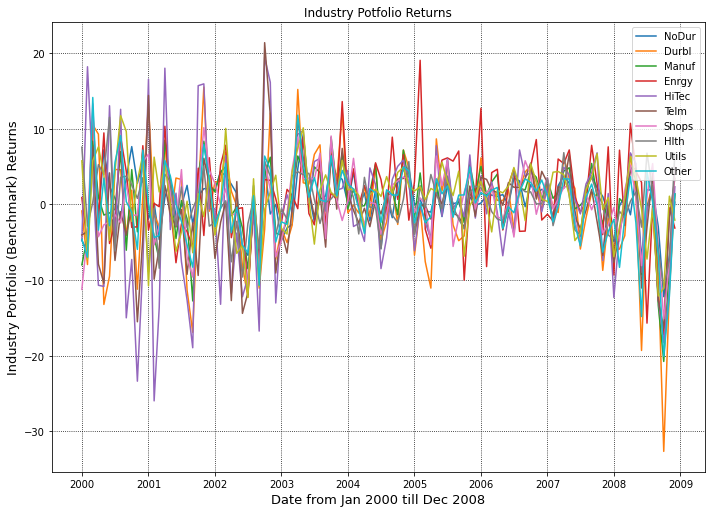

In [176]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(industry_portfolio_df_2000_2008.index, industry_portfolio_df_2000_2008.NoDur, label='NoDur')
plt.plot(industry_portfolio_df_2000_2008.index, industry_portfolio_df_2000_2008.Durbl, label='Durbl')
plt.plot(industry_portfolio_df_2000_2008.index, industry_portfolio_df_2000_2008.Manuf, label='Manuf')
plt.plot(industry_portfolio_df_2000_2008.index, industry_portfolio_df_2000_2008.Enrgy, label='Enrgy')
plt.plot(industry_portfolio_df_2000_2008.index, industry_portfolio_df_2000_2008.HiTec, label='HiTec')
plt.plot(industry_portfolio_df_2000_2008.index, industry_portfolio_df_2000_2008.Telcm, label='Telm')
plt.plot(industry_portfolio_df_2000_2008.index, industry_portfolio_df_2000_2008.Shops, label='Shops')
plt.plot(industry_portfolio_df_2000_2008.index, industry_portfolio_df_2000_2008.Hlth, label='Hlth')
plt.plot(industry_portfolio_df_2000_2008.index, industry_portfolio_df_2000_2008.Utils, label='Utils')
plt.plot(industry_portfolio_df_2000_2008.index, industry_portfolio_df_2000_2008.Other, label='Other')

plt.title('Industry Potfolio Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Industry Portfolio (Benchmark) Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [177]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
industry_portfolio_df_2000_2008_2 = industry_portfolio_df_2000_2008.copy()

In [178]:
# Adding up all the returns of all asset classes for all assets

In [179]:
industry_portfolio_df_2000_2008_2.columns

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth',
       'Utils', 'Other'],
      dtype='object')

In [180]:
industry_portfolio_df_2000_2008_2['Portfolio_R'] = industry_portfolio_df_2000_2008_2['NoDur'] + industry_portfolio_df_2000_2008_2['Durbl'] + industry_portfolio_df_2000_2008_2['Manuf'] + industry_portfolio_df_2000_2008_2['Enrgy'] + industry_portfolio_df_2000_2008_2['HiTec'] + industry_portfolio_df_2000_2008_2['Telcm']  + industry_portfolio_df_2000_2008_2['Shops'] + industry_portfolio_df_2000_2008_2['Hlth']+ industry_portfolio_df_2000_2008_2['Utils']+ industry_portfolio_df_2000_2008_2['Other']

In [181]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [182]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
industry_portfolio_df_2000_2008_2['Industry_Port_Value'] = ((industry_portfolio_df_2000_2008_2['Portfolio_R'] + 1).cumprod())*1000

In [183]:
industry_portfolio_df_2000_2008_2[['NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth',
                                   'Utils','Other','Portfolio_R', 'Industry_Port_Value']].head(5)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Portfolio_R,Industry_Port_Value
Date,,,,,,,,,,,,
2000-01-01,-4.77,-0.87,-7.99,0.90,-4.71,-4.04,-11.23,7.56,5.75,-4.64,-24.04,-2.304000e+04
2000-02-01,-6.19,-7.95,-4.24,-5.44,18.18,-3.59,-3.86,-2.88,-7.26,-6.98,-30.21,6.729984e+05
2000-03-01,7.74,10.51,8.36,12.26,3.95,7.57,13.28,0.28,5.77,14.12,83.84,5.709718e+07
2000-04-01,-1.82,9.27,0.96,-1.98,-10.69,-7.90,-4.27,5.25,7.60,-3.41,-6.99,-3.420121e+08
2000-05-01,7.22,-13.22,-1.41,9.44,-10.84,-10.41,-2.70,3.94,3.90,3.46,-10.62,3.290157e+09


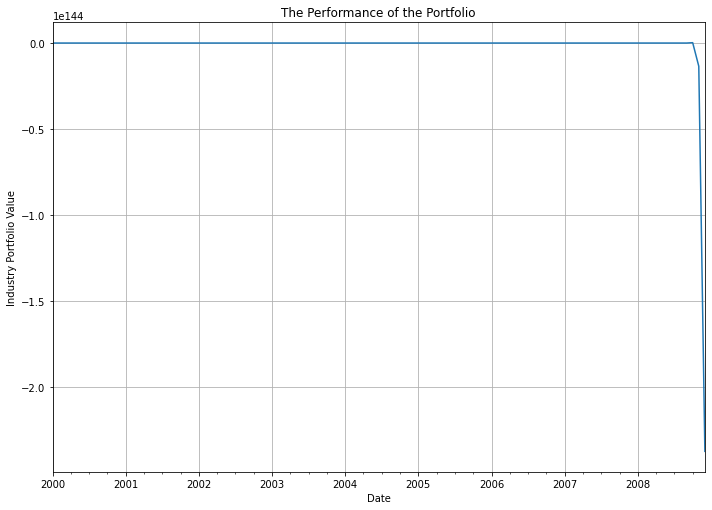

In [184]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2000 till Dec 2008');
plt.ylabel('Industry Portfolio Value');
industry_portfolio_df_2000_2008_2['Industry_Port_Value'].plot(grid=True)
# plt.xticks(rotation=90);
plt.show();

<h4><center>Investment on a Mixture of Different Asset Classes Portfolio</center></h4>

In [185]:
# Use pandas.concat() function to concatenate pandas objects along a particular axis with optional set logic along
# the other axes.
# I Concatenate Portfolio value of different asset classes (Bonds, Equities, Emerge Market Equities, Commodities, 
# Foreign Currencies)
# I create a hypothetical $1,000 portfolio for each

mix_port_2000_2008 = pd.concat([bond_df_2000_2008_2['Bond_Port_Value'],
                               equity_df_2000_2008_2['Equity_Port_Value'],
                               commodity_df_2000_2008_2['Commodity_Port_Value'],
                               currency_df_2000_2008_2['Currency_Port_Value']],axis=1).reindex(bond_df_2000_2008_2.index)
mix_port_2000_2008

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
Date,,,,
2000-02-01,1030.537531,1044.592448,982.006669,1021.138262
2000-03-01,1055.980198,1069.191670,981.640584,1010.954446
2000-04-01,1041.380097,1013.427200,948.023610,1030.336328
2000-05-01,1049.678171,956.805696,981.163047,1029.916631
2000-06-01,1052.824326,996.771813,991.239436,1024.214332
...,...,...,...,...
2008-08-01,1082.379953,1807.224305,3550.402818,761.639122
2008-09-01,1085.446520,1509.443591,3459.695539,744.549520
2008-10-01,1089.294987,1106.237340,2875.009175,773.888131


In [186]:
mix_port_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2000-02-01 to 2008-12-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bond_Port_Value       107 non-null    float64
 1   Equity_Port_Value     107 non-null    float64
 2   Commodity_Port_Value  107 non-null    float64
 3   Currency_Port_Value   107 non-null    float64
dtypes: float64(4)
memory usage: 4.2 KB


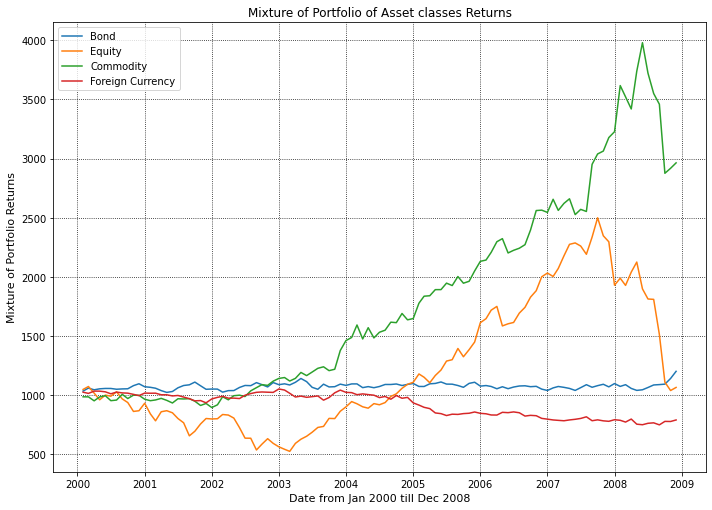

In [187]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Bond_Port_Value, label='Bond')
plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Equity_Port_Value, label='Equity')
plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Commodity_Port_Value, label='Commodity')                               
plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Currency_Port_Value, label='Foreign Currency')
                               
plt.title('Mixture of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [274]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
mix_port_2000_2008.describe()

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
count,107.000000,107.000000,107.000000,107.000000
mean,1071.669732,1222.519858,1788.598348,914.024717
std,25.668333,542.209043,848.843501,97.890365
min,1019.416758,520.024755,891.182082,744.549520
25%,1053.919255,800.551740,995.165403,822.677005
50%,1069.554325,1013.427200,1567.308142,964.015772
75%,1086.911651,1667.287742,2357.924592,1000.489474
max,1197.850338,2498.184119,3981.094821,1048.497049


**With Risk Parity Strategy on the Asset Classes and Portfolio (RP):**

In [188]:
1/4

0.25

In [189]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Risk_Parity_Strategy_2000_2008 = mix_port_2000_2008.copy()

In [190]:
Risk_Parity_Strategy_2000_2008['Bond_Port_Value_25%'] = Risk_Parity_Strategy_2000_2008['Bond_Port_Value'] * .25
Risk_Parity_Strategy_2000_2008['Equity_Port_Value_25%'] = Risk_Parity_Strategy_2000_2008['Equity_Port_Value'] * .25
Risk_Parity_Strategy_2000_2008['Commodity_Port_Value_25%'] = Risk_Parity_Strategy_2000_2008['Commodity_Port_Value'] * .25
Risk_Parity_Strategy_2000_2008['Currency_Port_Value_25%'] = Risk_Parity_Strategy_2000_2008['Currency_Port_Value'] * .25

In [191]:
Risk_Parity_Strategy_2000_2008.head()

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,Bond_Port_Value_25%,Equity_Port_Value_25%,Commodity_Port_Value_25%,Currency_Port_Value_25%
Date,,,,,,,,
2000-02-01,1030.537531,1044.592448,982.006669,1021.138262,257.634383,261.148112,245.501667,255.284565
2000-03-01,1055.980198,1069.191670,981.640584,1010.954446,263.995049,267.297918,245.410146,252.738612
2000-04-01,1041.380097,1013.427200,948.023610,1030.336328,260.345024,253.356800,237.005903,257.584082
2000-05-01,1049.678171,956.805696,981.163047,1029.916631,262.419543,239.201424,245.290762,257.479158
2000-06-01,1052.824326,996.771813,991.239436,1024.214332,263.206081,249.192953,247.809859,256.053583


In [192]:
Risk_Parity_Strategy_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2000-02-01 to 2008-12-01
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bond_Port_Value           107 non-null    float64
 1   Equity_Port_Value         107 non-null    float64
 2   Commodity_Port_Value      107 non-null    float64
 3   Currency_Port_Value       107 non-null    float64
 4   Bond_Port_Value_25%       107 non-null    float64
 5   Equity_Port_Value_25%     107 non-null    float64
 6   Commodity_Port_Value_25%  107 non-null    float64
 7   Currency_Port_Value_25%   107 non-null    float64
dtypes: float64(8)
memory usage: 7.5 KB


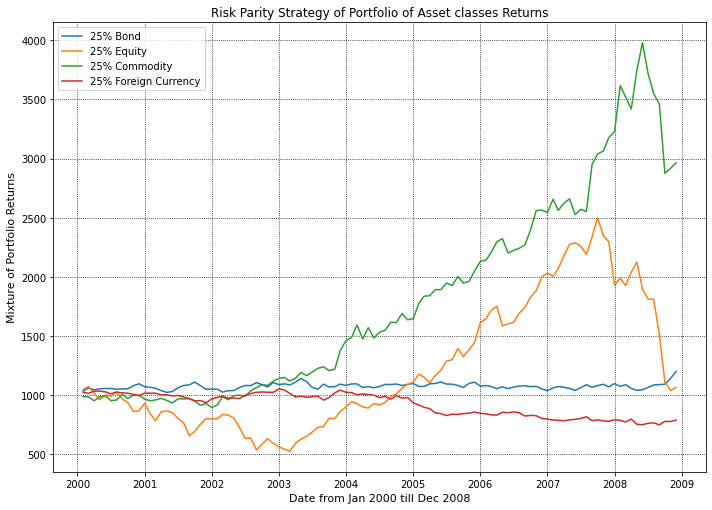

In [193]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Risk_Parity_Strategy_2000_2008.index, Risk_Parity_Strategy_2000_2008.Bond_Port_Value, label='25% Bond')
plt.plot(Risk_Parity_Strategy_2000_2008.index, Risk_Parity_Strategy_2000_2008.Equity_Port_Value, label='25% Equity')
plt.plot(Risk_Parity_Strategy_2000_2008.index, Risk_Parity_Strategy_2000_2008.Commodity_Port_Value, label='25% Commodity')                               
plt.plot(Risk_Parity_Strategy_2000_2008.index, Risk_Parity_Strategy_2000_2008.Currency_Port_Value, label='25% Foreign Currency')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [276]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
Risk_Parity_Strategy_2000_2008[['Bond_Port_Value','Equity_Port_Value','Commodity_Port_Value','Currency_Port_Value']].describe()

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
count,107.000000,107.000000,107.000000,107.000000
mean,1071.669732,1222.519858,1788.598348,914.024717
std,25.668333,542.209043,848.843501,97.890365
min,1019.416758,520.024755,891.182082,744.549520
25%,1053.919255,800.551740,995.165403,822.677005
50%,1069.554325,1013.427200,1567.308142,964.015772
75%,1086.911651,1667.287742,2357.924592,1000.489474
max,1197.850338,2498.184119,3981.094821,1048.497049


**With 60/40 Portfolio:**

- The 60/40 Portfolio composed of 60% Equities, and 40% Bonds

In [194]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
RP_60_40_Portfolio_2000_2008 = mix_port_2000_2008[['Bond_Port_Value','Equity_Port_Value']].copy()

In [195]:
RP_60_40_Portfolio_2000_2008['Bond_Port_Value_40%'] = RP_60_40_Portfolio_2000_2008['Bond_Port_Value'] * .40
RP_60_40_Portfolio_2000_2008['Equity_Port_Value_60%'] = RP_60_40_Portfolio_2000_2008['Equity_Port_Value'] * .60

In [196]:
RP_60_40_Portfolio_2000_2008

,Bond_Port_Value,Equity_Port_Value,Bond_Port_Value_40%,Equity_Port_Value_60%
Date,,,,
2000-02-01,1030.537531,1044.592448,412.215012,626.755469
2000-03-01,1055.980198,1069.191670,422.392079,641.515002
2000-04-01,1041.380097,1013.427200,416.552039,608.056320
2000-05-01,1049.678171,956.805696,419.871269,574.083417
2000-06-01,1052.824326,996.771813,421.129730,598.063088
...,...,...,...,...
2008-08-01,1082.379953,1807.224305,432.951981,1084.334583
2008-09-01,1085.446520,1509.443591,434.178608,905.666155
2008-10-01,1089.294987,1106.237340,435.717995,663.742404


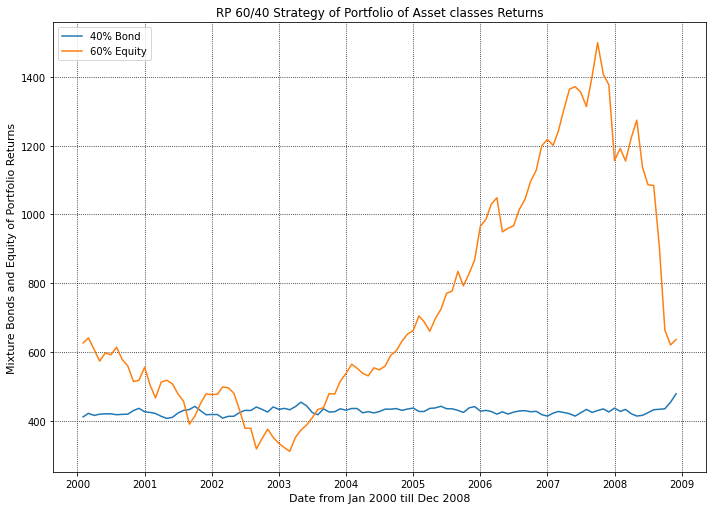

In [197]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(RP_60_40_Portfolio_2000_2008.index, RP_60_40_Portfolio_2000_2008['Bond_Port_Value_40%'], label='40% Bond')
plt.plot(RP_60_40_Portfolio_2000_2008.index, RP_60_40_Portfolio_2000_2008['Equity_Port_Value_60%'], label='60% Equity')
                               
plt.title('RP 60/40 Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=11)
plt.ylabel('Mixture Bonds and Equity of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [277]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
RP_60_40_Portfolio_2000_2008[['Bond_Port_Value_40%','Equity_Port_Value_60%']].describe()

,Bond_Port_Value_40%,Equity_Port_Value_60%
count,107.000000,107.000000
mean,428.667893,733.511915
std,10.267333,325.325426
min,407.766703,312.014853
25%,421.567702,480.331044
50%,427.821730,608.056320
75%,434.764660,1000.372645
max,479.140135,1498.910471


**With Ten months Moving Average on the Asset Classes and Portfolio:**

In [198]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Moving_Average_Portfolio_2000_2008 = mix_port_2000_2008.copy()

In [199]:
# Calculating Moving Average with 10 numbers of observations on Mixture Portfolio 
# Use pandas.DataFrame.rolling(window=10) function to provide rolling window 10 of calculations
# Use Python mean() method to calculate the arithmetic mean (average) of data

Moving_Average_Portfolio_2000_2008['Bond_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2008['Bond_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2008['Equity_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2008['Equity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2008['Commodity_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2008['Commodity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2008['Currency_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2008['Currency_Port_Value'].rolling(window=10).mean()


In [200]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
Moving_Average_Portfolio_2000_2008.dropna(axis=0, inplace=True)
Moving_Average_Portfolio_2000_2008.head()

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,Bond_Port_Value_Avg,Equity_Port_Value_Avg,Commodity_Port_Value_Avg,Currency_Port_Value_Avg
Date,,,,,,,,
2000-11-01,1076.524008,858.123559,995.949972,1002.730751,1050.460907,984.796980,975.438807,1017.694744
2000-12-01,1092.506374,864.098023,994.525544,992.163285,1056.657792,966.747537,976.690695,1014.797246
2001-01-01,1067.325295,927.612745,961.698407,1013.561697,1057.792302,952.589645,974.696477,1015.057971
2001-02-01,1062.495938,837.302613,949.140345,1012.335413,1059.903886,934.977186,974.808150,1013.257880
2001-03-01,1054.781370,778.703296,955.405516,1012.862984,1060.414205,917.166946,972.232397,1011.552515


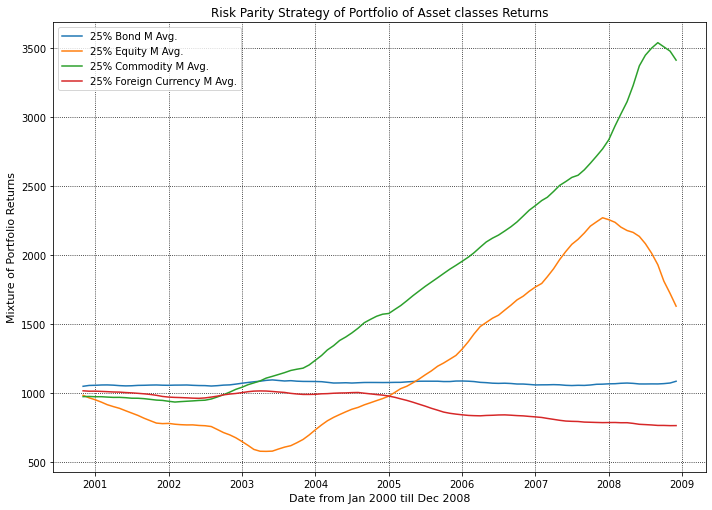

In [201]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Moving_Average_Portfolio_2000_2008.index, Moving_Average_Portfolio_2000_2008.Bond_Port_Value_Avg, label='25% Bond M Avg.')
plt.plot(Moving_Average_Portfolio_2000_2008.index, Moving_Average_Portfolio_2000_2008.Equity_Port_Value_Avg, label='25% Equity M Avg.')
plt.plot(Moving_Average_Portfolio_2000_2008.index, Moving_Average_Portfolio_2000_2008.Commodity_Port_Value_Avg, label='25% Commodity M Avg.')                               
plt.plot(Moving_Average_Portfolio_2000_2008.index, Moving_Average_Portfolio_2000_2008.Currency_Port_Value_Avg, label='25% Foreign Currency M Avg.')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [278]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
Moving_Average_Portfolio_2000_2008[['Bond_Port_Value_Avg','Equity_Port_Value_Avg',
                                    'Commodity_Port_Value_Avg','Currency_Port_Value_Avg']].describe()

,Bond_Port_Value_Avg,Equity_Port_Value_Avg,Commodity_Port_Value_Avg,Currency_Port_Value_Avg
count,98.000000,98.000000,98.000000,98.000000
mean,1071.113361,1224.033587,1758.793507,915.880526
std,12.095345,543.658681,793.606454,91.855758
min,1050.460907,578.627718,936.222991,765.153158
25%,1059.804056,776.526164,1013.138874,833.019926
50%,1071.170003,973.108960,1565.641763,966.442445
75%,1081.581289,1697.128487,2316.718826,998.929038
max,1096.747641,2272.488388,3541.790605,1017.694744


**With Moving Average (MA) Crossover Strategy**

- The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time.

- The moving average crossover strategy is geared toward finding the middle of a trend.  A trend defines price action in which prices move in a specific direction over a period of time.  Generally trends are either upward or downward, as sideways movements are considered consolidation and not trends. 

In [202]:
moving_average_df = mix_port_2000_2008.copy()
moving_average_df.head(3)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
Date,,,,
2000-02-01,1030.537531,1044.592448,982.006669,1021.138262
2000-03-01,1055.980198,1069.191670,981.640584,1010.954446
2000-04-01,1041.380097,1013.427200,948.023610,1030.336328


In [203]:
# Create moving average of 10 months
moving_average_df['MA10_bond'] = moving_average_df['Bond_Port_Value'].rolling(10).mean()
moving_average_df['MA10_equity'] = moving_average_df['Equity_Port_Value'].rolling(10).mean()
moving_average_df['MA10_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(10).mean()
moving_average_df['MA10_currency'] = moving_average_df['Currency_Port_Value'].rolling(10).mean()

# Create moving average of 20 months
moving_average_df['MA20_bond'] = moving_average_df['Bond_Port_Value'].rolling(20).mean()
moving_average_df['MA20_equity'] = moving_average_df['Equity_Port_Value'].rolling(20).mean()
moving_average_df['MA20_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(20).mean()
moving_average_df['MA20_currency'] = moving_average_df['Currency_Port_Value'].rolling(20).mean()

In [204]:
moving_average_df.head(6)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,MA10_bond,MA10_equity,MA10_commodity,MA10_currency,MA20_bond,MA20_equity,MA20_commodity,MA20_currency
Date,,,,,,,,,,,,
2000-02-01,1030.537531,1044.592448,982.006669,1021.138262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,1055.980198,1069.191670,981.640584,1010.954446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,1041.380097,1013.427200,948.023610,1030.336328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,1049.678171,956.805696,981.163047,1029.916631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-01,1052.824326,996.771813,991.239436,1024.214332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-01,1052.681084,987.100902,949.287683,1007.563558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
moving_average_df.dropna(axis=0, inplace=True)
moving_average_df.head(5)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,MA10_bond,MA10_equity,MA10_commodity,MA10_currency,MA20_bond,MA20_equity,MA20_commodity,MA20_currency
Date,,,,,,,,,,,,
2001-09-01,1083.645910,651.626541,966.407618,966.156490,1057.794106,818.593374,960.717272,995.819278,1054.127507,901.695177,968.078040,1006.757011
2001-10-01,1106.686724,690.408544,944.685565,947.978069,1059.212141,801.224426,955.733274,991.400756,1057.934966,883.985982,966.211984,1003.099001
2001-11-01,1075.461331,752.171917,908.644939,950.177518,1060.025745,783.680344,950.427927,985.062338,1058.909023,868.134994,962.562202,1000.060155
2001-12-01,1045.757601,798.246643,925.725795,931.253764,1058.351911,779.774747,948.086473,976.954174,1059.127898,857.375966,961.447311,995.106027
2002-01-01,1047.944255,794.442610,891.182082,964.015772,1057.668199,781.348678,941.664129,972.069452,1059.041202,849.257812,956.948263,991.810984


In [206]:
# Define the Buy and Sell Signals (Trade Signals) of all asset classes of Portfolio

# Buy and Sell Signals of Bonds
Buy_Bond = []
Sell_Bond = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_bond.iloc[i] > moving_average_df.MA20_bond.iloc[i] \
    and moving_average_df.MA10_bond.iloc[i-1] < moving_average_df.MA20_bond.iloc[i-1]:
        Buy_Bond.append(i)
        
    elif moving_average_df.MA10_bond.iloc[i] < moving_average_df.MA20_bond.iloc[i] \
    and moving_average_df.MA10_bond.iloc[i-1] > moving_average_df.MA20_bond.iloc[i-1]:
        Sell_Bond.append(i)    

# Buy and Sell Signals of Equity
Buy_Equity = []
Sell_Equity = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_equity.iloc[i] > moving_average_df.MA20_equity.iloc[i] \
    and moving_average_df.MA10_equity.iloc[i-1] < moving_average_df.MA20_equity.iloc[i-1]:
        Buy_Equity.append(i)
        
    elif moving_average_df.MA10_equity.iloc[i] < moving_average_df.MA20_equity.iloc[i] \
    and moving_average_df.MA10_equity.iloc[i-1] > moving_average_df.MA20_equity.iloc[i-1]:
        Sell_Equity.append(i)    
        
# Buy and Sell Signals of Commodity
Buy_Commodity = []
Sell_Commodity = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_commodity.iloc[i] > moving_average_df.MA20_commodity.iloc[i] \
    and moving_average_df.MA10_commodity.iloc[i-1] < moving_average_df.MA20_commodity.iloc[i-1]:
        Buy_Commodity.append(i)
        
    elif moving_average_df.MA10_commodity.iloc[i] < moving_average_df.MA20_commodity.iloc[i] \
    and moving_average_df.MA10_commodity.iloc[i-1] > moving_average_df.MA20_commodity.iloc[i-1]:
        Sell_Commodity.append(i)    

# Buy and Sell Signals of Currency
Buy_Currency = []
Sell_Currency = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_currency.iloc[i] > moving_average_df.MA20_currency.iloc[i] \
    and moving_average_df.MA10_currency.iloc[i-1] < moving_average_df.MA20_currency.iloc[i-1]:
        Buy_Currency.append(i)
        
    elif moving_average_df.MA10_currency.iloc[i] < moving_average_df.MA20_currency.iloc[i] \
    and moving_average_df.MA10_currency.iloc[i-1] > moving_average_df.MA20_currency.iloc[i-1]:
        Sell_Currency.append(i)    

In [207]:
Buy_Bond, Sell_Bond

([5, 13, 41, 74], [3, 9, 29, 54])

In [208]:
Buy_Equity, Sell_Equity

([26], [82])

In [209]:
Buy_Commodity, Sell_Commodity

([11], [0])

In [210]:
Buy_Currency, Sell_Currency

([13, 34], [25, 38])

In [211]:
moving_average_df.columns

Index(['Bond_Port_Value', 'Equity_Port_Value', 'Commodity_Port_Value',
       'Currency_Port_Value', 'MA10_bond', 'MA10_equity', 'MA10_commodity',
       'MA10_currency', 'MA20_bond', 'MA20_equity', 'MA20_commodity',
       'MA20_currency'],
      dtype='object')

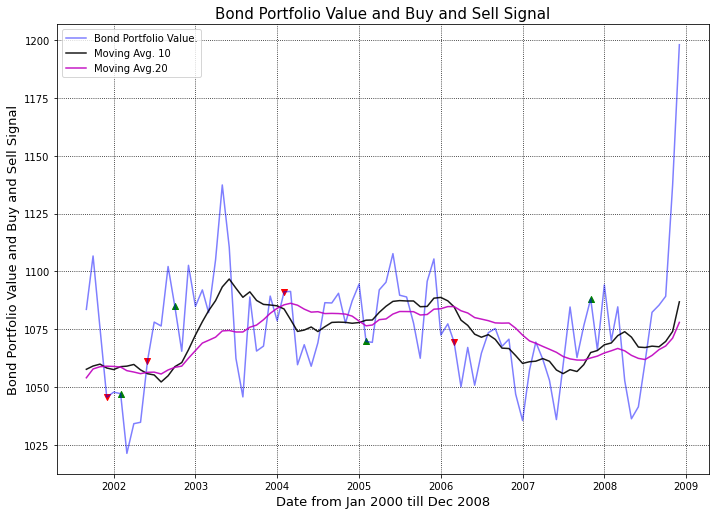

In [212]:
rcParams['figure.figsize'] = 11.69,8.27

# Bond Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Bond_Port_Value, label='Bond Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_bond, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_bond, label='Moving Avg.20',c='m' ,alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Bond].index,moving_average_df.iloc[Buy_Bond]['Bond_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Bond].index,moving_average_df.iloc[Sell_Bond]['Bond_Port_Value'], marker='v', color='r')
                               
plt.title('Bond Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Bond Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

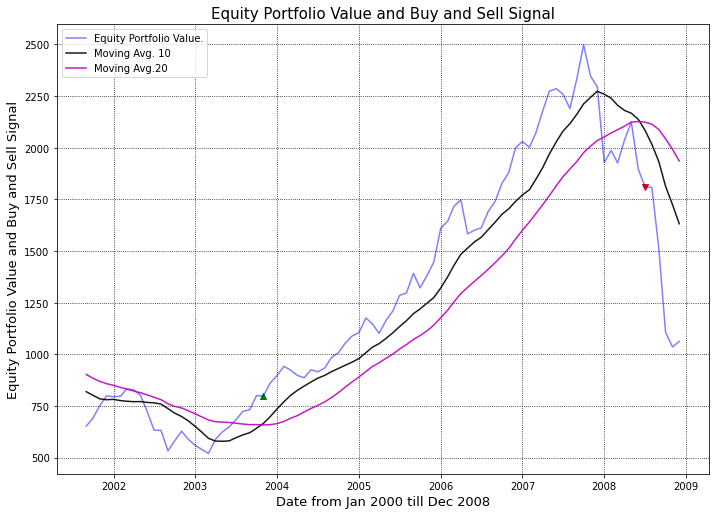

In [213]:
rcParams['figure.figsize'] = 11.69,8.27

# Equity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Equity_Port_Value, label='Equity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_equity, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_equity, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Equity].index,moving_average_df.iloc[Buy_Equity]['Equity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Equity].index,moving_average_df.iloc[Sell_Equity]['Equity_Port_Value'], marker='v', color='r')
                               
plt.title('Equity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Equity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

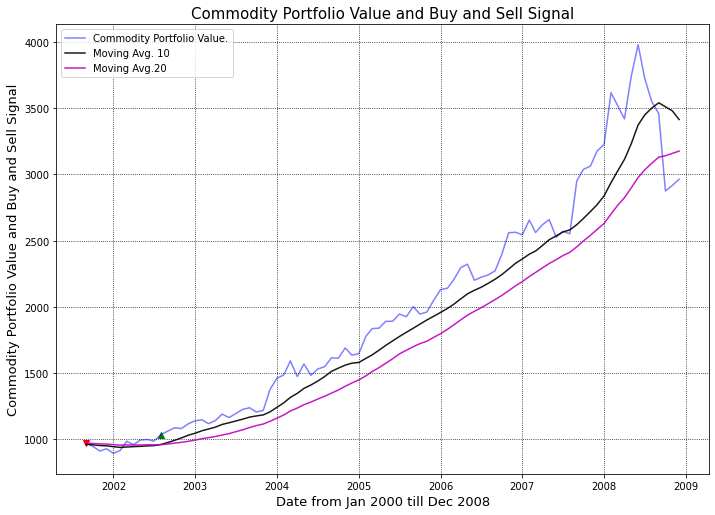

In [214]:
rcParams['figure.figsize'] = 11.69,8.27

# Commodity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Commodity_Port_Value, label='Commodity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_commodity, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_commodity, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Commodity].index,moving_average_df.iloc[Buy_Commodity]['Commodity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Commodity].index,moving_average_df.iloc[Sell_Commodity]['Commodity_Port_Value'], marker='v', color='r')
                               
plt.title('Commodity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Commodity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

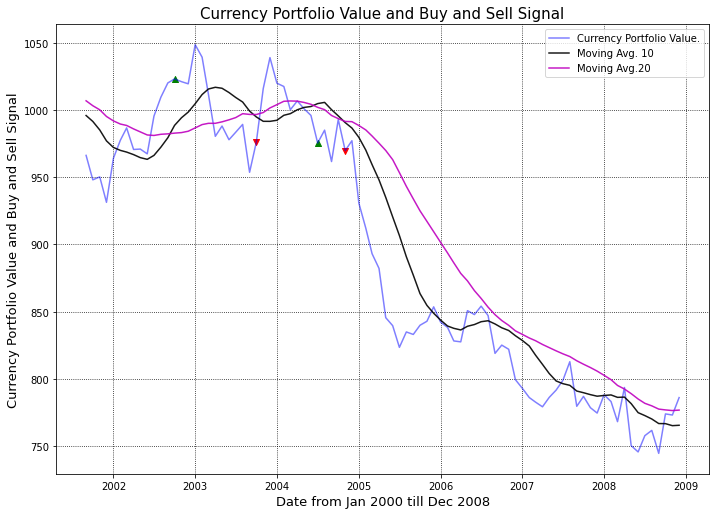

In [215]:
rcParams['figure.figsize'] = 11.69,8.27

# Currency Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Currency_Port_Value, label='Currency Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_currency, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_currency, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Currency].index, moving_average_df.iloc[Buy_Currency]['Currency_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Currency].index, moving_average_df.iloc[Sell_Currency]['Currency_Port_Value'], marker='v', color='r')
                               
plt.title('Currency Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Currency Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

**With Moving Average (MA) Strategy (10 months)**

In [216]:
moving_average_df_10 = mix_port_2000_2008.copy()
moving_average_df_10.head(3)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
Date,,,,
2000-02-01,1030.537531,1044.592448,982.006669,1021.138262
2000-03-01,1055.980198,1069.191670,981.640584,1010.954446
2000-04-01,1041.380097,1013.427200,948.023610,1030.336328


In [217]:
# Create moving average of 10 months
moving_average_df_10['MA10_bond'] = moving_average_df['Bond_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_equity'] = moving_average_df['Equity_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_currency'] = moving_average_df['Currency_Port_Value'].rolling(10).mean()

In [218]:
moving_average_df_10.head(6)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,MA10_bond,MA10_equity,MA10_commodity,MA10_currency
Date,,,,,,,,
2000-02-01,1030.537531,1044.592448,982.006669,1021.138262,NaN,NaN,NaN,NaN
2000-03-01,1055.980198,1069.191670,981.640584,1010.954446,NaN,NaN,NaN,NaN
2000-04-01,1041.380097,1013.427200,948.023610,1030.336328,NaN,NaN,NaN,NaN
2000-05-01,1049.678171,956.805696,981.163047,1029.916631,NaN,NaN,NaN,NaN
2000-06-01,1052.824326,996.771813,991.239436,1024.214332,NaN,NaN,NaN,NaN
2000-07-01,1052.681084,987.100902,949.287683,1007.563558,NaN,NaN,NaN,NaN


In [219]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
moving_average_df_10.dropna(axis=0, inplace=True)
moving_average_df_10.head(5)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,MA10_bond,MA10_equity,MA10_commodity,MA10_currency
Date,,,,,,,,
2002-06-01,1061.381768,720.589961,995.805262,967.307899,1055.896071,766.545605,947.761520,963.232147
2002-07-01,1078.160661,631.852901,984.283950,995.357023,1055.347546,764.568241,949.549153,966.152201
2002-08-01,1076.474897,631.224601,1032.596184,1009.476944,1052.326363,758.649846,958.340215,972.302088
2002-09-01,1102.146876,531.759106,1059.583652,1020.048703,1054.994918,736.608565,973.434086,979.289207
2002-10-01,1085.006196,581.160752,1084.955684,1023.030976,1058.919777,714.899976,989.357075,988.466928


In [220]:
# Define the Buy and Sell Signals (Trade Signals) of all asset classes of Portfolio
# If the Moving Avg. (10 months) < asset value, the decision is buy the asset
# If the moving Avg. (10 months) < asset value, the decision is sell the asset

# Buy and Sell Signals of Bonds
Buy_Bond = []
Sell_Bond = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_bond.iloc[i] < moving_average_df_10.Bond_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_bond.iloc[i-1] > moving_average_df_10.Bond_Port_Value.iloc[i-1]:
        Buy_Bond.append(i)
        
    elif moving_average_df_10.MA10_bond.iloc[i] > moving_average_df_10.Bond_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_bond.iloc[i-1] < moving_average_df_10.Bond_Port_Value.iloc[i-1]:
        Sell_Bond.append(i)    

# Buy and Sell Signals of Equity
Buy_Equity = []
Sell_Equity = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_equity.iloc[i] < moving_average_df_10.Equity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_equity.iloc[i-1] > moving_average_df_10.Equity_Port_Value.iloc[i-1]:
        Buy_Equity.append(i)
        
    elif moving_average_df_10.MA10_equity.iloc[i] > moving_average_df_10.Equity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_equity.iloc[i-1] < moving_average_df_10.Equity_Port_Value.iloc[i-1]:
        Sell_Equity.append(i)    
        
# Buy and Sell Signals of Commodity
Buy_Commodity = []
Sell_Commodity = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_commodity.iloc[i] < moving_average_df_10.Commodity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_commodity.iloc[i-1] > moving_average_df_10.Commodity_Port_Value.iloc[i-1]:
        Buy_Commodity.append(i)
        
    elif moving_average_df_10.MA10_commodity.iloc[i] > moving_average_df_10.Commodity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_commodity.iloc[i-1] < moving_average_df_10.Commodity_Port_Value.iloc[i-1]:
        Sell_Commodity.append(i)    

# Buy and Sell Signals of Currency
Buy_Currency = []
Sell_Currency = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_currency.iloc[i] < moving_average_df_10.Currency_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_currency.iloc[i-1] > moving_average_df_10.Currency_Port_Value.iloc[i-1]:
        Buy_Currency.append(i)
        
    elif moving_average_df_10.MA10_currency.iloc[i] > moving_average_df_10.Currency_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_currency.iloc[i-1] < moving_average_df_10.Currency_Port_Value.iloc[i-1]:
        Sell_Currency.append(i)    

In [221]:
Buy_Bond, Sell_Bond

([10, 18, 20, 26, 30, 34, 41, 50, 57, 61, 74],
 [9, 13, 19, 22, 29, 32, 39, 43, 54, 58, 70])

In [222]:
Buy_Equity, Sell_Equity

([10], [67])

In [223]:
Buy_Commodity, Sell_Commodity

([0, 61, 63], [60, 62, 75])

In [224]:
Buy_Currency, Sell_Currency

([17, 42, 47, 61, 67, 70, 76], [9, 23, 43, 51, 63, 68, 71])

In [225]:
moving_average_df_10.columns

Index(['Bond_Port_Value', 'Equity_Port_Value', 'Commodity_Port_Value',
       'Currency_Port_Value', 'MA10_bond', 'MA10_equity', 'MA10_commodity',
       'MA10_currency'],
      dtype='object')

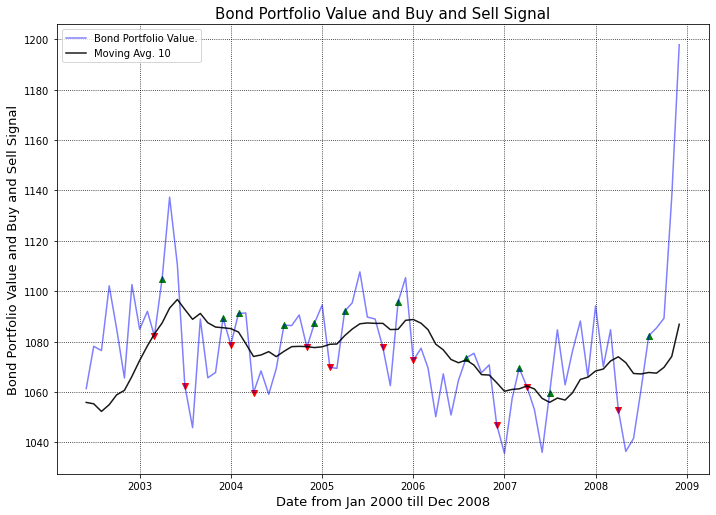

In [226]:
rcParams['figure.figsize'] = 11.69,8.27

# Bond Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Bond_Port_Value, label='Bond Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_bond, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Bond].index,moving_average_df_10.iloc[Buy_Bond]['Bond_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Bond].index,moving_average_df_10.iloc[Sell_Bond]['Bond_Port_Value'], marker='v', color='r')
                               
plt.title('Bond Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Bond Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

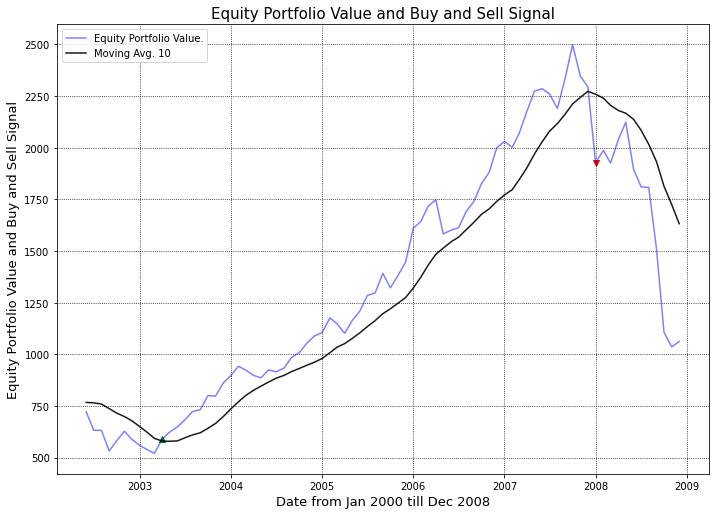

In [227]:
rcParams['figure.figsize'] = 11.69,8.27

# Equity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Equity_Port_Value, label='Equity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_equity, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Equity].index,moving_average_df_10.iloc[Buy_Equity]['Equity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Equity].index,moving_average_df_10.iloc[Sell_Equity]['Equity_Port_Value'], marker='v', color='r')
                               
plt.title('Equity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Equity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

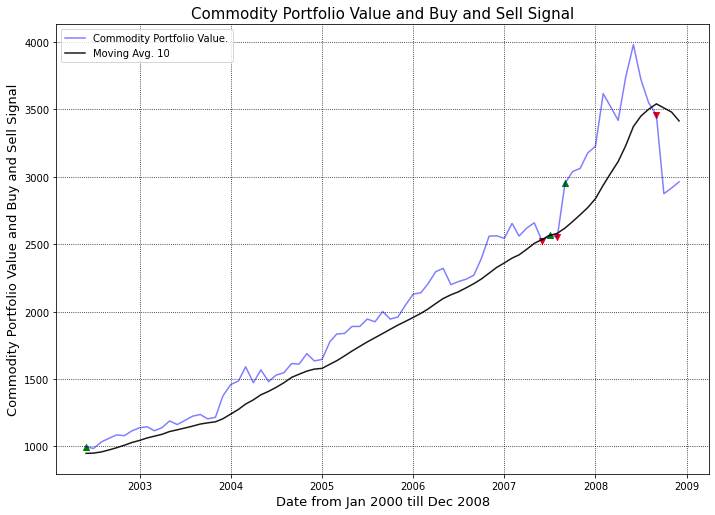

In [228]:
rcParams['figure.figsize'] = 11.69,8.27

# Commodity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Commodity_Port_Value, label='Commodity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_commodity, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Commodity].index,moving_average_df_10.iloc[Buy_Commodity]['Commodity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Commodity].index,moving_average_df_10.iloc[Sell_Commodity]['Commodity_Port_Value'], marker='v', color='r')
                               
plt.title('Commodity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Commodity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

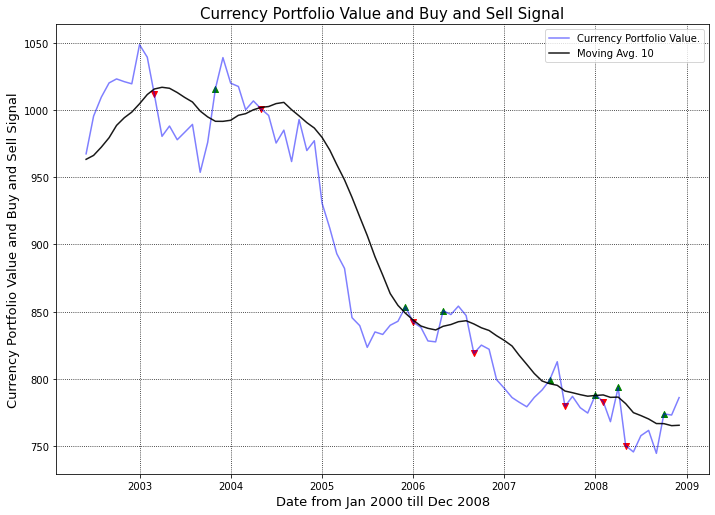

In [229]:
rcParams['figure.figsize'] = 11.69,8.27

# Currency Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Currency_Port_Value, label='Currency Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_currency, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Currency].index, moving_average_df_10.iloc[Buy_Currency]['Currency_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Currency].index, moving_average_df_10.iloc[Sell_Currency]['Currency_Port_Value'], marker='v', color='r')
                               
plt.title('Currency Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Currency Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

**With Trading Strategy Using Moving Average Convergence Divergence (MACD)**

- Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.

- The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. Traders may buy the security when the MACD crosses above its signal line and sell—or short—the security when the MACD crosses below the signal line. 

In [230]:
MACD_df = mix_port_2000_2008.copy()
MACD_df.head(3)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
Date,,,,
2000-02-01,1030.537531,1044.592448,982.006669,1021.138262
2000-03-01,1055.980198,1069.191670,981.640584,1010.954446
2000-04-01,1041.380097,1013.427200,948.023610,1030.336328


In [231]:
# Calculate MACD and Signal Line for Bond Portfolio Value
# Calculate the short term exponential moving average (short_EMA)
# Use pandas.DataFrame.ewn() function to provide exponential weighted (EW) functions,
# such as mean(), var(), std(), corr(), cov().

MACD_df['short_EMA'] = MACD_df.Bond_Port_Value.ewm(span=12, adjust=False).mean()
MACD_df['long_EMA'] = MACD_df.Bond_Port_Value.ewm(span=26, adjust=False).mean()

In [232]:
# Calculate the MACD Line
MACD_df['MACD_Line'] = MACD_df['short_EMA'] - MACD_df['long_EMA']

In [233]:
# Calculate the Signal Line
MACD_df['Signal_Line'] = MACD_df.MACD_Line.ewm(span=9, adjust=False).mean()

In [234]:
MACD_df.head()

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,short_EMA,long_EMA,MACD_Line,Signal_Line
Date,,,,,,,,
2000-02-01,1030.537531,1044.592448,982.006669,1021.138262,1030.537531,1030.537531,0.000000,0.000000
2000-03-01,1055.980198,1069.191670,981.640584,1010.954446,1034.451787,1032.422173,2.029614,0.405923
2000-04-01,1041.380097,1013.427200,948.023610,1030.336328,1035.517681,1033.085723,2.431958,0.811130
2000-05-01,1049.678171,956.805696,981.163047,1029.916631,1037.696218,1034.314793,3.381425,1.325189
2000-06-01,1052.824326,996.771813,991.239436,1024.214332,1040.023619,1035.685870,4.337750,1.927701


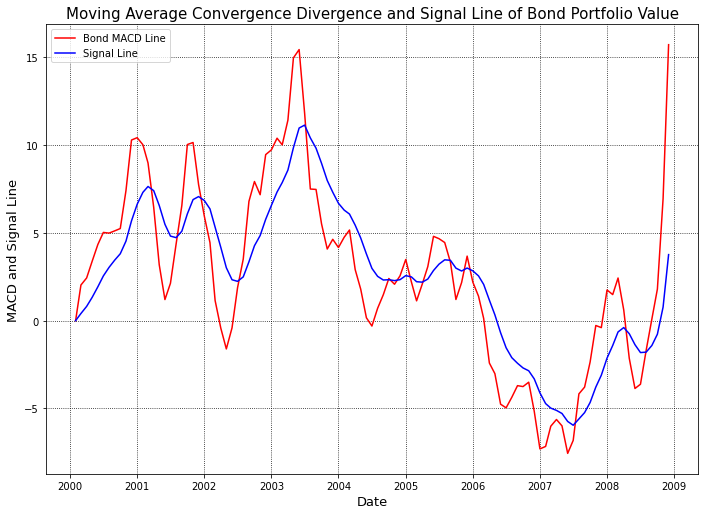

In [235]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(MACD_df.index, MACD_df.MACD_Line, label='Bond MACD Line', c='red')
plt.plot(MACD_df.index, MACD_df.Signal_Line, label='Signal Line', c='blue')
                               
plt.title('Moving Average Convergence Divergence and Signal Line of Bond Portfolio Value', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('MACD and Signal Line', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

<h4><center>Other RP techniques of Portfolio</center></h4>

In [236]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2000_2008 = pd.read_csv('Bond_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2000_2008.head()

(108, 7)


,Date,Germany,Australia,US,UK,Canada,Japan
0,1/1/2000,98.71,102.11,95.28,100.23,92.80,99.87
1,2/1/2000,99.07,106.07,100.59,102.33,95.62,99.70
2,3/1/2000,101.07,108.00,103.66,103.86,96.91,100.86
3,4/1/2000,100.46,107.28,102.28,104.06,95.09,100.13
4,5/1/2000,100.53,109.13,101.53,104.33,96.27,100.59


In [237]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2000_2008['Date'] = pd.to_datetime(bond_df_2000_2008.Date)

In [238]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2000_2008.set_index('Date',inplace=True)

In [239]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2000_2008 = np.log(1+bond_df_2000_2008[['Germany','Australia','US','UK','Canada','Japan']].pct_change())

In [240]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2000_2008.dropna(axis=0, inplace=True)
bond_df_2000_2008.head(5)

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2000-02-01,0.003640,0.038049,0.054233,0.020735,0.029935,-0.001704
2000-03-01,0.019987,0.018032,0.030063,0.014841,0.013401,0.011568
2000-04-01,-0.006054,-0.006689,-0.013402,0.001924,-0.018959,-0.007264
2000-05-01,0.000697,0.017098,-0.007360,0.002591,0.012333,0.004584
2000-06-01,-0.003687,0.000092,0.020086,0.000862,0.012798,-0.011901


In [241]:
1/6

0.16666666666666666

In [242]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [243]:
# Use numpy.dot() function to returns the dot product of two arrays.
np.dot(bond_df_2000_2008.mean(), weights)

0.0011033709326959606

In [244]:
def portfolio_returns(weights):
    return np.dot(bond_df_2000_2008.mean(), weights)

In [245]:
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
bond_df_2000_2008.cov()

,Germany,Australia,US,UK,Canada,Japan
Germany,0.000325,0.000202,0.000262,-0.000111,0.000157,0.000015
Australia,0.000202,0.000539,0.000314,0.000210,0.000220,0.000014
US,0.000262,0.000314,0.000640,0.000013,0.000261,0.000039
UK,-0.000111,0.000210,0.000013,0.006786,0.000026,0.000013
Canada,0.000157,0.000220,0.000261,0.000026,0.000277,0.000022
Japan,0.000015,0.000014,0.000039,0.000013,0.000022,0.000225


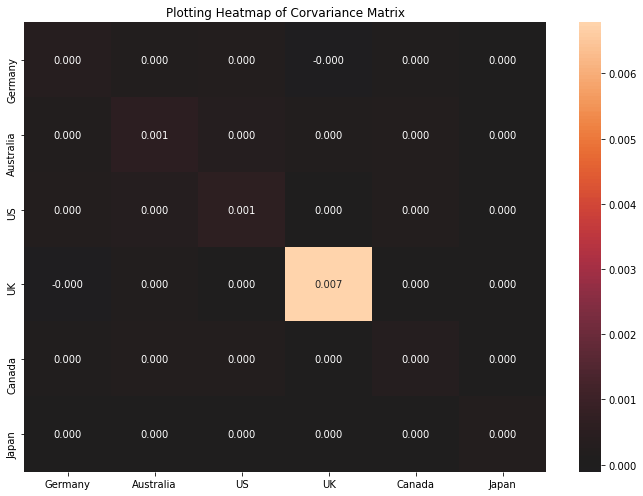

In [246]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.title('Plotting Heatmap of Corvariance Matrix');
# Use seaborn.heatmap() function to plot rectangular data as a color-encoded matrix.
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
sb.heatmap(bond_df_2000_2008.cov(),annot=True,fmt='.3f', center=0);

In [247]:
# Calculate the portfolio_variance 
portfolio_variance = weights[0]**2* 0.000276 + weights[1]**2* 0.000196 + weights[2]**2* 0.000438 + weights[3]**2* 0.007404 + weights[4]**2* 0.000166 + weights[5]**2* 0.000211
portfolio_variance

0.00024141666666666663

In [248]:
# calculate the portfolio standard deviation (Standard deviation = Square root of the variance)
portfolio_standard_deviation = portfolio_variance**(1/2)
portfolio_standard_deviation

0.015537588830531803

In [249]:
bond_df_2000_2008.shape[0]

107

In [250]:
portfolio_variance**(1/2)*np.sqrt(107)

0.16072206859461874

In [251]:
# Calculate the portfolio_variance 
np.dot(np.dot(bond_df_2000_2008.cov(),weights),weights)

0.000336251208829535

In [252]:
# calculate the portfolio standard deviation
(np.dot(np.dot(bond_df_2000_2008.cov(),weights),weights))**(1/2)

0.018337153782131375

In [253]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2008.cov(),weights),weights))**(1/2)

In [254]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2008.cov(),weights),weights))**(1/2)*np.sqrt(250)

**The Efficient Frontier**

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
- Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [255]:
def weights_creator(bond_df_2000_2008):
    rand = np.random.random(len(bond_df_2000_2008.columns))
    rand /= rand.sum()
    return rand


In [256]:
weights_creator(bond_df_2000_2008)

array([0.18944373, 0.06078247, 0.25523108, 0.12068727, 0.27383361,
       0.10002184])

In [257]:
def portfolio_returns(weights):
    return np.dot(bond_df_2000_2008.mean(), weights)

In [258]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [259]:
portfolio_returns(weights)

0.0011033709326959606

In [260]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2008.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [261]:
portfolio_std(weights)

0.2899358587815308

In [262]:
# Generate efficient frontier

returns = []
stds = []
w = []

for i in range(500):
    weights = weights_creator(bond_df_2000_2008)
    returns.append(portfolio_returns(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)
    

In [263]:
returns

[0.0011649669462116348,
 0.0008099169114626826,
 0.0010334189321094846,
 0.0010814158047876112,
 0.0009939390811461698,
 0.0009823177365625452,
 0.0012702948872321727,
 0.0011125470432177375,
 0.0013387750250045331,
 0.0014064418693125872,
 0.001222263493778638,
 0.0009843040630357104,
 0.0012868944715589718,
 0.0013636791016151553,
 0.001345733319199115,
 0.0010394668723346513,
 0.0011316456736044978,
 0.0008353926213572811,
 0.0009523251502001817,
 0.0010542656322261507,
 0.0008877044036661398,
 0.0012072519924415754,
 0.0009749237473571987,
 0.0009337118609683537,
 0.0007504181173577513,
 0.0010329873657274325,
 0.0008153022342909642,
 0.0006752393550943669,
 0.0010381595314009234,
 0.0014354592619357548,
 0.0010032081864492454,
 0.0010740522016609935,
 0.0012318505022453408,
 0.0011575169975559887,
 0.001161754633223629,
 0.0010832301264495077,
 0.0015034226445025836,
 0.0012815117765510426,
 0.0012792763815984236,
 0.001057968276599753,
 0.001055808536362972,
 0.001056528729356433

In [264]:
stds

[0.3520967671535501,
 0.35359696424398546,
 0.2923214377133421,
 0.30005180894641936,
 0.2037849646005116,
 0.23607185893614602,
 0.46602851727410494,
 0.24677021415328268,
 0.3906115731194601,
 0.34523934406554063,
 0.33266956190262476,
 0.35161534869745376,
 0.3634469634037598,
 0.28847305991790434,
 0.29108530144510614,
 0.2742813467321058,
 0.30576030778586416,
 0.2017687573872186,
 0.31809314724561183,
 0.2289129526857263,
 0.2113610365926162,
 0.2460141627564514,
 0.23065804541253346,
 0.3402909266310976,
 0.2348488373190526,
 0.22074821640736406,
 0.3115574531103421,
 0.223412270037295,
 0.2453875828924823,
 0.33225387282181096,
 0.3077569418826996,
 0.3139039499564571,
 0.34562445061579916,
 0.3410353009833667,
 0.2846404850933364,
 0.36810039724512966,
 0.34392045762337436,
 0.4585373604342005,
 0.2749301412777793,
 0.28235313440921456,
 0.3418968122585786,
 0.3024106452586841,
 0.26516503084727727,
 0.23081785761974544,
 0.2718221376728895,
 0.2756224141566186,
 0.35120900734

In [265]:
w

[array([0.04534754, 0.23979833, 0.17431131, 0.22145421, 0.17067815,
        0.14841046]),
 array([0.08212379, 0.12561361, 0.04762417, 0.24581611, 0.07145049,
        0.42737183]),
 array([0.1617991 , 0.17844759, 0.0349758 , 0.18144811, 0.2258457 ,
        0.2174837 ]),
 array([0.02321273, 0.09714852, 0.31152504, 0.17486997, 0.08990766,
        0.30333608]),
 array([0.1995705 , 0.16289488, 0.11704802, 0.00462836, 0.26071056,
        0.25514768]),
 array([0.16679945, 0.29207397, 0.21983997, 0.01500259, 0.12319427,
        0.18308975]),
 array([0.01098726, 0.19116546, 0.36419446, 0.31591954, 0.02152207,
        0.09621122]),
 array([0.04934796, 0.26386169, 0.30875222, 0.03193356, 0.15960486,
        0.18649971]),
 array([0.1430935 , 0.00610751, 0.19851915, 0.27113857, 0.26166283,
        0.11947843]),
 array([0.22793794, 0.01604612, 0.20812695, 0.21875895, 0.3042544 ,
        0.02487564]),
 array([0.233025  , 0.20235467, 0.12387652, 0.19959115, 0.21743298,
        0.02371968]),
 array([0.

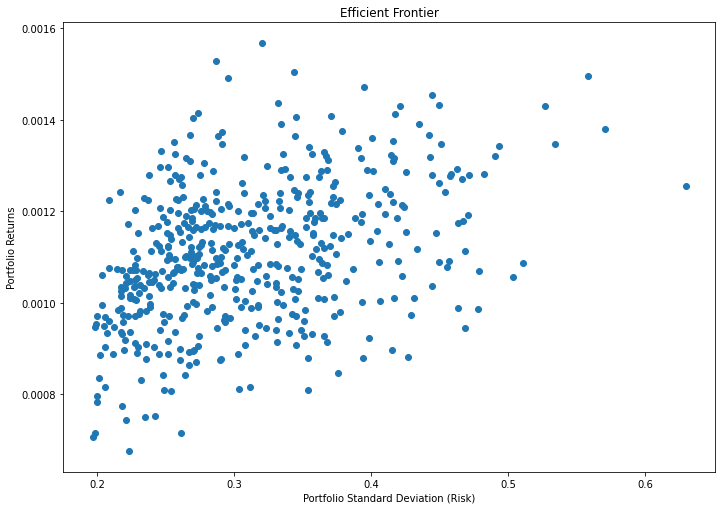

In [266]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [267]:
bond_df_2000_2008.shape[0]

107

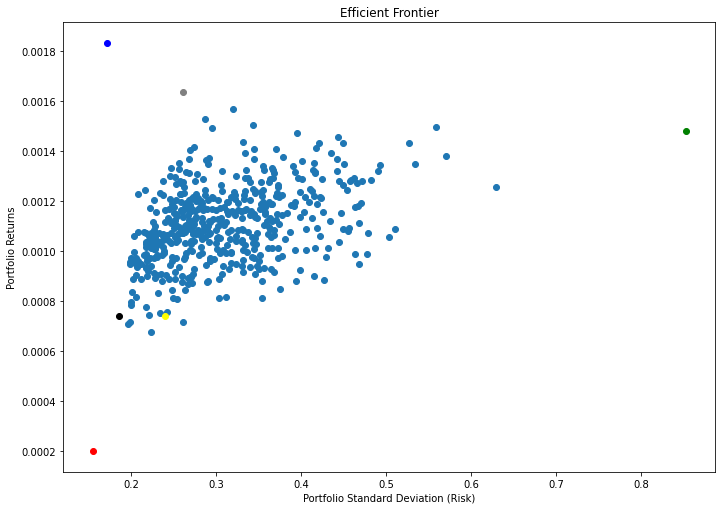

In [268]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2000_2008.std().iloc[0]*np.sqrt(107), bond_df_2000_2008.mean().iloc[0],c='k')
plt.scatter(bond_df_2000_2008.std().iloc[1]*np.sqrt(107), bond_df_2000_2008.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2000_2008.std().iloc[2]*np.sqrt(107), bond_df_2000_2008.mean().iloc[2],c='gray')
plt.scatter(bond_df_2000_2008.std().iloc[3]*np.sqrt(107), bond_df_2000_2008.mean().iloc[3],c='green')
plt.scatter(bond_df_2000_2008.std().iloc[4]*np.sqrt(107), bond_df_2000_2008.mean().iloc[4],c='blue')
plt.scatter(bond_df_2000_2008.std().iloc[5]*np.sqrt(107), bond_df_2000_2008.mean().iloc[5],c='red')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

**Minimum Variance Portfolio (MV)**

- A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return.

- A minimum variance portfolio is a collection of securities that combine to minimize the price volatility of the overall portfolio. Volatility is a statistical measure of a particular security's price movement (ups and downs).

In [269]:
min(stds)

0.19680329034108845

In [270]:
stds.index(min(stds))

494

In [271]:
# Minimum Variance Portfolio
returns[stds.index(min(stds))]

0.000707066375889442

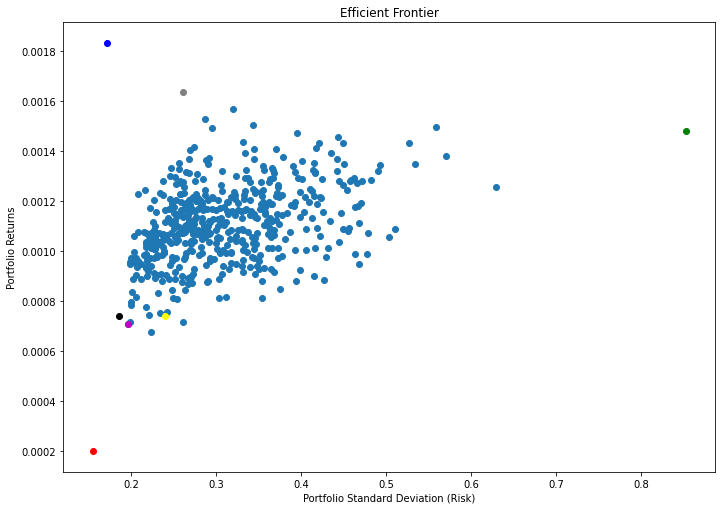

In [272]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2000_2008.std().iloc[0]*np.sqrt(107), bond_df_2000_2008.mean().iloc[0],c='k')
plt.scatter(bond_df_2000_2008.std().iloc[1]*np.sqrt(107), bond_df_2000_2008.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2000_2008.std().iloc[2]*np.sqrt(107), bond_df_2000_2008.mean().iloc[2],c='gray')
plt.scatter(bond_df_2000_2008.std().iloc[3]*np.sqrt(107), bond_df_2000_2008.mean().iloc[3],c='green')
plt.scatter(bond_df_2000_2008.std().iloc[4]*np.sqrt(107), bond_df_2000_2008.mean().iloc[4],c='blue')
plt.scatter(bond_df_2000_2008.std().iloc[5]*np.sqrt(107), bond_df_2000_2008.mean().iloc[5],c='red')

plt.scatter(min(stds),returns[stds.index(min(stds))], c='m')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [273]:
# Calcualte the Sharpe Ratio
mean = np.mean(returns)
sigma = np.std(returns)

Sharpe_Ratio = mean / sigma
Sharpe_Ratio

7.310870794376242